 
# *Predykcja zjawiska churnu wśród klientów z sektora telekomunikacyjnego*

Paweł Pachliński  
pachlins@wit.edu.pl



## A. Wstęp:

### - Cel pracy

$\;\;\;$Zidentyfikowanie klientów, którzy zrezygnują z usług operatora telekomunikacyjnego, na podstawie cech i zachowań klientów, którzy takiej rezygnacji dokonali. 

### - Źródło danych:

$\;\;\;$Dane pochodzącą z platformy kaggle: https://www.kaggle.com/raumonsa11/churn-telco-europa-spa-eng

### - Opis problemu:

$\;\;\;$ **Churn** czyli migracja/odejście klientów do konkurencji/zaprzestanie korzystania z usług/ to jedno z większych wyzwań przed jakimi stają współczesne przedsiębiorstwa. Przeciwdziałanie takiemu zjawisko jest korzystne, ponieważ pozyskanie nowego klienta na konkurencyjnym i dojrzałym rynku jest z reguły znacznie droższe niż utrzymanie obecnego klienta.  Stąd potrzeba wyznaczenia grupy klientów potencjalnie zagrożonych ryzykiem odejścia i zaoferowanie im specjalnych usług/procesów/rabatów, które odwiodą ich od rezygnacji z usług/produktów danego dostawcy.  
<BR>$\;\;\;$ Walka z migracją klientów dotyczy właściwie każdego sektora, ale w tych branżach, gdzie zbierane są informacje o klientach, ich cechach oraz zachowaniach- jest łatwiejsza ze względu na możliwości predykcyjne. Do takich branż należą m.in.:  
    <BR>
    *- Telekomunikacja*   
    *- Bankowość*
    *- Ubezpieczenia*  
    *- Sieci sprzedaży detalicznej*  
    *- Energia elektryczna*
    *- Serwisy internetowe*

<BR>$\;\;\;$Sektor telekomunikacyjny ma dostęp do setek, a nawet tysięcy informacji na temat każdego klienta. Mogą one dotyczyć danych z obszarów:  
    <BR>
    **- Klienta:** *danych demograficznych, usługi z których korzysta i związanymi z tym wzorcami zachowań.*  
    **- Modeli** telefonów: *ich markami, technologiami, aplikacjami itp.*  
    **- Dane usage`owe:** *informacje z zakresu billingu, ilości, czasy, kierunki połączeń, transmisja danych, urle, oglądany kontent itd.*  
    **- Finansowe:** *wysokości faktur, opóźnienia w spłatach, ponaglenia, noty odsetkowe, wezwania do zapłaty itp.*  
    **- Lokalizacyjne:** *bieżąca lokalizacja, historia lokalizacji, roaming, miejsca w których wykorzystuje się głównie dane usługi.*  
    **- Sieci społeczne:** *z kim dany użytkownik się kontaktuje, jak intensywnie, jaką rolę odgrywa w swojej mini siatce kontaktów (jest głównym ogniwem w swojej sieci lub elementem mniej istotnym).*  

<BR>$\;\;\;$ W połączeniu z informacją o klientach, którzy zrezygnowali z usług operatora- daje to ogromne możliwości przewidywania prawdopodobieństwa zajścia takiego zjawiska i podjęcia działań, mających na celu zatrzymanie klienta.  
<BR>$\;\;\;$Model churn to klasyczny przykład problemu typu klasyfikacyjnego, gdzie z wykorzystaniem zbioru zmiennych objaśniających musimy wskazać wartość przyjmowaną przez zmienną modelowaną. W przeciwieństwie do problemów regresyjnych, w problemach klasyfikacji zmienna modelowana nie przyjmuje wartości ciągłych, lecz wartości binarne lub jedną z kilku etykiet (klasyfikacja wieloklasowa).

## B Realizacja projektu:

### 1. Załadowanie bibliotek:

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import datasets
import matplotlib.ticker as mtick
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # walidacja zbioru
from sklearn.tree import DecisionTreeClassifier # Algorytm drzewa decyzyjnego
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

os.chdir('E:\praca_dyplomowa')

#ustawienie opcji wyswietlania
#pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 10)
#pd.set_option('display.max_colwidth', 40)


### 2. Wczytanie danych: 

In [2]:
df=pd.read_csv(r'train_churn_kg2.csv', delimiter=';', decimal=".")


Sprawdzmy rozmiar zbioru oraz ilość zmiennych:

In [3]:
print('Zbiór zawiera {} obserwacji, opisanych poprzez {} zmiennych.'.format(df.shape[0], df.shape[1]))

Zbiór zawiera 183751 obserwacji, opisanych poprzez 20 zmiennych.


Szybki podgląd załadowanych danych:

In [4]:
df.head()

,CETEL_NUMBER,CNI_CUSTOMER,DAYS_LIFE,DEVICE_TECNOLOGY,MIN_PLAN,...,CITY_DATA,TEC_ANT_VOICE,STATE_VOICE,CITY_VOICE,CHURN
0,56991715723,761130129,455,1,200,...,93.0,2.5,10.0,93.0,0
1,56936225196,155259159,180,2,2500,...,38.0,3.0,6.0,38.0,0
2,56989789214,143481697,480,1,2500,...,313.0,3.0,4.0,342.0,0
3,56990739868,72526880,173,2,2500,...,268.0,4.0,100.0,268.0,0
4,56993149265,160008989,317,1,2500,...,156.0,4.0,5.0,156.0,0


### 3. Przegląd załadowanych danych

Podgląd  zmiennych w załadowanym zbiorze:

In [5]:
print('Lista kolumn:')
for col in df.columns:
    print( col)

Lista kolumn:
CETEL_NUMBER
CNI_CUSTOMER
DAYS_LIFE
DEVICE_TECNOLOGY
MIN_PLAN
PRICE_PLAN
TOT_MIN_CALL_OUT
AVG_MIN_CALL_OUT_3
TOT_MIN_IN_ULT_MES
AVG_MIN_IN_3
ROA_LASTMONTH
ROACETEL_LAST_MONTH
DEVICE
TEC_ANT_DATA
STATE_DATA
CITY_DATA
TEC_ANT_VOICE
STATE_VOICE
CITY_VOICE
CHURN


Opis zawartości kolumn:  
**- CETEL_NUMBER:** $\;\;\;$ *MSISDN*  
**- CNI_CUSTOMER:**$\;\;\;$ *id_klienta*  
**- DAYS_LIFE:**$\;\;\;$ *staz*  
**- DEVICE_TECNOLOGY:**$\;\;\;$	*technologia_telefonu*   
**- MIN_PLAN:**$\;\;\;$	*ilosc_minut_w_planie_taryfowym*  
**- PRICE_PLAN:**$\;\;\;$	*cena_planu_taryfowego*  
**- TOT_MIN_CALL_OUT:**$\;\;\;$	*total_min_call_out*  
**- AVG_MIN_CALL_OUT_3:**$\;\;\;$	*avg_min_call_out_3m*  
**- TOT_MIN_IN_ULT_MES:**$\;\;\;$	*total_min_in*    
**- AVG_MIN_IN_3:**$\;\;\;$	*total_min_in_3m*    
**- ROA_LASTMONTH:**$\;\;\;$	*ile_razy_dochodziło_do_transmisji_danych_w_ramingu_krajowym*  
**- ROACETEL_LAST_MONTH:**$\;\;\;$	*ilosc_minut_w_roamingu_krajowym*  
**- DEVICE:**$\;\;\;$	*urządzenie (1 Sony, 2 Motorola, 3 Huawei, 4 Apple, 5 LG 6 Nokia, 7 Samsung, 8 Alcatel, 9 Verykool, 10 Lenovo, 11 Mobiwire, 12 ZTE, 13 Sony Ericsson, 14 BlackBerry, 15 VSN Mobil, 16 VSN, 17 T610, 18 Other)*  
**- TEC_ANT_DATA:**$\;\;\;$	*technologia_transmisji_danych*  
**- STATE_DATA:**$\;\;\;$	*glowny_stan_do_trasmisji_danych*  
**- CITY_DATA:**$\;\;\;$	*glowne_miasto_do_transmisji_danych*  
**- TEC_ANT_VOICE:**	$\;\;\;$ *technologia_transmisji_glosu*  
**- STATE_VOICE:**$\;\;\;$	*glowna_lokalizacja_do_trasmisji_glosu*  
**- CITY_VOICE:**$\;\;\;$	*glowna_lokalizacja_do_transmisji_danych*  
**- CHURN:**	churn$\;\;\;$ *(0 = Churn Yes, 1 Churn No)*    




Jak widac znajdują się w nim numery telefonów oraz id klienta, ktore  nie bedą potrzebne w dalszej analizie.

In [6]:
df.drop(['CETEL_NUMBER','CNI_CUSTOMER'], axis=1, inplace=True)

W zbiorze znajdują się rowniez zmienne:  
**- STATE_DATA**  
**- CITY_DATA**  
**- STATE_VOICE**  
**- CITY_VOICE**  
mówiace o lokalizacjach kienta, w ktorych głównie dokonuje transmisji daty i głosu. Lokalizacje przedstawione są w dwóch wymiarach: STATE oraz CITY. Sprawdzmy ile roznych kategorii wchodzi w skład tych zmiennych:

In [7]:
def unic_values_in_column(data_frame, column_name):
    unic_values=(len(data_frame[column_name].unique()))
    print('Zmienna: {};unikalne wartosci: {} '.format(column_name, unic_values))

unic_values_in_column(df, 'STATE_DATA')
unic_values_in_column(df, 'CITY_DATA')
unic_values_in_column(df, 'STATE_VOICE')
unic_values_in_column(df, 'CITY_VOICE')

Zmienna: STATE_DATA;unikalne wartosci: 17 
Zmienna: CITY_DATA;unikalne wartosci: 335 
Zmienna: STATE_VOICE;unikalne wartosci: 17 
Zmienna: CITY_VOICE;unikalne wartosci: 340 


Sprawdziłem empirycznie (przy użyciu funkcji crosstab) iż dane o miastach zawierają się w danych o stanach w związku z czym nie ma potrzeby przechowywać obu tych zmiennych. Zmienne dotyczące miast zostaną usunięte ze zbioru. Po ich usunięciu sprawdzimy kontrolnie czy zostały usunięte

In [8]:
df.drop(['CITY_VOICE','CITY_DATA'], axis=1, inplace=True) 
df.columns

Index(['DAYS_LIFE', 'DEVICE_TECNOLOGY', 'MIN_PLAN', 'PRICE_PLAN',
       'TOT_MIN_CALL_OUT', 'AVG_MIN_CALL_OUT_3', 'TOT_MIN_IN_ULT_MES',
       'AVG_MIN_IN_3', 'ROA_LASTMONTH', 'ROACETEL_LAST_MONTH', 'DEVICE',
       'TEC_ANT_DATA', 'STATE_DATA', 'TEC_ANT_VOICE', 'STATE_VOICE', 'CHURN'],
      dtype='object')

### 4. Nadanie odpowiednich typów zmiennym:

Zmienne ciągłe:

In [9]:
df['DAYS_LIFE']=df['DAYS_LIFE'].astype('int')
df['TOT_MIN_CALL_OUT']=df['TOT_MIN_CALL_OUT'].astype('int')
df['AVG_MIN_CALL_OUT_3']=df['AVG_MIN_CALL_OUT_3'].astype('int')
df['TOT_MIN_IN_ULT_MES']=df['TOT_MIN_IN_ULT_MES'].astype('int')
df['AVG_MIN_IN_3']=df['AVG_MIN_IN_3'].astype('int')
df['ROA_LASTMONTH']=df['ROA_LASTMONTH'].astype('int')
df['ROACETEL_LAST_MONTH']=df['ROACETEL_LAST_MONTH'].astype('int')

Zmienne kategoryczne porządkowe:

In [10]:
df['MIN_PLAN']=df['MIN_PLAN'].astype('category')
df['DEVICE_TECNOLOGY']=df['DEVICE_TECNOLOGY'].astype('category')
df['TEC_ANT_DATA']=df['TEC_ANT_DATA'].astype('category')
df['TEC_ANT_VOICE']=df['TEC_ANT_VOICE'].astype('category')
df['PRICE_PLAN']=df['PRICE_PLAN'].astype('category')

Zmienne kategoryczne nominalne:

In [11]:
df['DEVICE']=df['DEVICE'].astype('object')
df['STATE_DATA']=df['STATE_DATA'].astype('object')
df['STATE_VOICE']=df['STATE_VOICE'].astype('object')


Zmienna celu:

In [12]:
df['CHURN']=df['CHURN'].astype('bool')

### 5. Czyszczenie/obróbka zmiennych:

#### 5.1 Przesłownikowanie zmiennej DEVICE:

In [13]:
df.DEVICE.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],['Other','Sony', 'Motorola', 'Huawei', 'Apple', 'LG', 'Nokia', 'Samsung', 'Alcatel', 'Verykool', 'Lenovo', 'Mobiwire', 'ZTE', 'Sony_Ericsson', 'BlackBerry', 'VSN_Mobil', 'VSN', 'T610', 'Other'], inplace=True)


Poniewaz kategorii jest trochę za duzo, telefony wystpeujace ponizej 1000 sztuk wrzucimy to osobnej kategorii "other".

In [14]:
df.DEVICE.replace(['Sony_Ericsson',	'Huawei',	'Samsung',	'Motorola',	'LG',	'Nokia',	'Apple',	'Sony',	'Lenovo',	'ZTE',	'Verykool',	'Alcatel',	'Other',	'VSN_Mobil',	'VSN',	'Mobiwire',	'BlackBerry',	'T610'],['Sony_Ericsson',	'Huawei',	'Samsung',	'Motorola',	'LG',	'Nokia',	'Apple',	'Sony',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other'], inplace=True)
df['DEVICE'].value_counts()


Sony_Ericsson    96635
Huawei           34547
Samsung          24973
Motorola         13562
LG                4781
Nokia             2930
Apple             2805
other             2525
Sony               993
Name: DEVICE, dtype: int64

#### 5.2 Sprawdzenie ilości kategorii zmiennej PRICE_PLAN:

In [15]:
df['PRICE_PLAN'].value_counts()

13437    117868
16798     27690
8395      19265
10916      5102
21840      4790
3358       2315
25202      2231
6714       1418
2686        784
5375        485
2101        323
13445       266
10076       255
12597       228
9235        157
6719        135
0            93
10081        69
7555         60
10924        42
14286        28
5874         28
11765        27
16807        27
22689        15
12605        11
4366         11
18487         7
31092         5
6303          3
33613         3
42017         2
15958         2
21849         2
25210         2
9244          1
54622         1
Name: PRICE_PLAN, dtype: int64

Ze wzgledu na dużą liczbę kategorii zmiennej PRICE PLAN dokonamy jej kategoryzacji.<BR>  Wszystkie wartosci, które mają poniżej 400 wystąpień zostaną dodane do kategorii "other". 

In [16]:
df.PRICE_PLAN.replace([ 13437,	16798,	8395,	21840,	10916,	25202,	3358,	6714,	2686,	5375,	2101,	10076,	13445,	12597,	6719,	9235,	0,	10081,	7555,	10924,	16807,	14286,	5874,	11765,	22689,	12605,	4366,	18487,	31092,	6303,	25210,	33613,	42017,	15958,	17647,	21849,	9244,	54622],['13437',	'16798',	'8395',	'21840',	'10916','25202','3358',	'6714',	'2686',	'5375',	'2101',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other',	'other'], inplace=True)
df['PRICE_PLAN'].value_counts()
df['PRICE_PLAN']=df['PRICE_PLAN'].astype('category')



#### 5.3 Zmienna TEC_ANT_DATA

In [17]:
df['TEC_ANT_DATA'].value_counts()

4.0    146786
3.0     29318
0.0      6872
2.5       720
2.0        55
Name: TEC_ANT_DATA, dtype: int64

Poniewaz zmienna jest kategoryczna porządkowa (zawiera wartość 2.5) , przedefiniujmy jej wartosci nadajac im rangi całkowite:

In [18]:
df.TEC_ANT_DATA.replace([0,2,2.5,3,4],[1,2,3,4,5], inplace=True)
df['TEC_ANT_DATA']=df['TEC_ANT_DATA'].astype('category')#zamienmy zmienną ponownie na zmienną categoryczną

#### 5.4 Zmienna TEC_ANT_VOICE

Zmienne TEC_ANT_DATA i TEC_ANT_VOICE wydają się być ze sobą powiązane- bo tak wydaje się na podstawie ilosci w poszczegolnych kategoriach. Sprawdzmy to za pomocą funckji crosstab:

In [19]:
pd.crosstab(df.TEC_ANT_DATA, df.TEC_ANT_VOICE)

TEC_ANT_VOICE,0.0,2.0,2.5,3.0,4.0
TEC_ANT_DATA,,,,,
1,6774,98,0,0,0
2,0,46,3,5,1
3,0,8,695,9,8
4,0,53,158,24225,4882
5,0,47,205,5112,141422


Jak widac technologia transmisji glosu i danych wlasciwie jest taka sama, wobec czego nie potrzebujemy dwoch takich samych zmiennych.  
Usuwam jedną z nich:

In [20]:
df.drop(['TEC_ANT_VOICE'], axis=1, inplace=True) 

#### 5.5 Zmienna DAYS_LIFE

Zmienna 'DAYS_LIFE' zostanie przekształcona na zmienna wyrażoną w miesiacach, celem wiekszej przydatnosci do pozniejszego modelowania


In [21]:
df['DAYS_LIFE']=round(df['DAYS_LIFE']/30).astype('int')
df.rename(columns={"DAYS_LIFE":"MONTHS_LIFE"}, inplace=True)

#### 5.6 Zmienna celu CHURN:

Zmienna churn jako '0' przyjmuje klientów, ktorzy zrezygnowali z uslug, jako jako '1' klientow, ktorzy kontynuują umowę z operatorem.  
Zamienmy te wartosci dla łatwiejszej interpretacji modelu

In [22]:
print(df['CHURN'].value_counts())

True     160892
False     22859
Name: CHURN, dtype: int64


In [23]:
df.CHURN.replace([0,1],[1,0], inplace=True)
df['CHURN']=df['CHURN'].astype('bool')

### 6. Podstawowe statystki dot. zmiennych:

Zbudujmy  data frame o nazwie summary, ktory specyfikuje podstawowe informacje nt danych:  
- tj nazwa zmiennej,  
- informacja o jej typie,  
- informacja czy dana zmienna zawiera braki,  
- liczba braków,  
-  procentowa brakująch wartości w zmiennej.  

In [24]:
summary = pd.DataFrame(df.dtypes, columns=['Dtype'])
summary['Nulls'] = pd.DataFrame(df.isnull().any())
summary['Sum_of_nulls'] = pd.DataFrame(df.isnull().sum())
summary['Per_of_nulls'] = round((df.apply(pd.isnull).mean()*100),2)
summary['count_value'] = pd.DataFrame(df.isnull().count())
summary.Dtype = summary.Dtype.astype(str)
print(summary)

                        Dtype  Nulls  Sum_of_nulls  Per_of_nulls  count_value
MONTHS_LIFE             int32  False             0          0.00       183751
DEVICE_TECNOLOGY     category  False             0          0.00       183751
MIN_PLAN             category  False             0          0.00       183751
PRICE_PLAN           category  False             0          0.00       183751
TOT_MIN_CALL_OUT        int32  False             0          0.00       183751
AVG_MIN_CALL_OUT_3      int32  False             0          0.00       183751
TOT_MIN_IN_ULT_MES      int32  False             0          0.00       183751
AVG_MIN_IN_3            int32  False             0          0.00       183751
ROA_LASTMONTH           int32  False             0          0.00       183751
ROACETEL_LAST_MONTH     int32  False             0          0.00       183751
DEVICE                 object  False             0          0.00       183751
TEC_ANT_DATA         category  False             0          0.00

Braki danych występują w dwóch zmiennych: STATE_DATA i STATE_VOICE i dotyczą 2,69% rekordów z danej zmiennej

### 7. Braki i błedy danych

#### 7.1 mapa ciepła

Za pomocą **mapy ciepła** sprawdźmy czy braki danych w dwóch powyższych zmiennych dotyczą tych samych rekordów, czy też braki występują w różnych miejscach. Ma to o tyle znacznie, że usuwając rekordy z brakami danych w tych kolumnach możemy się pozbyć między 2,69% a 5,38% wszystkich rekordów w zbiorze.

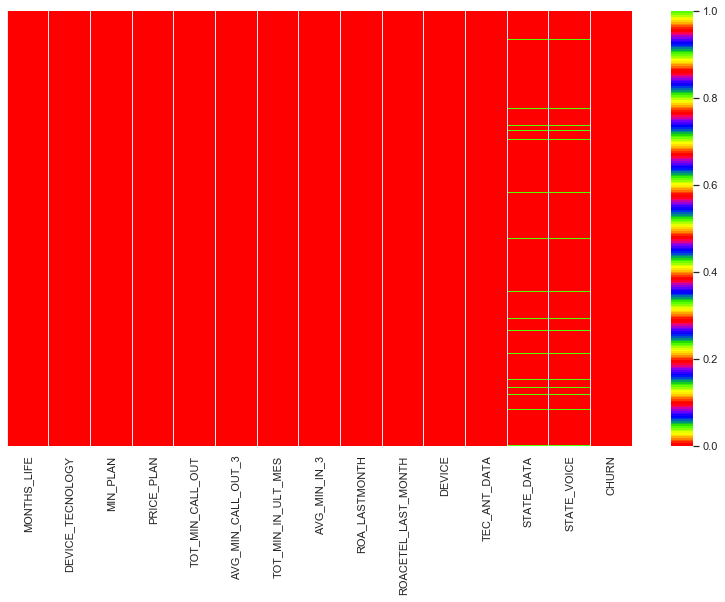

In [25]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.0, style="dark")
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='prism')

Z powyższego wykresu wydaje się, iż braki danych w obu zmiennych dotyczą tych samych rekordów.  
Zatem usunięcie ich nie będzie dużym uszczerbkiem w ilości danych. Potwierdźmy to: 

In [26]:
print(str(round(df.isnull().any(axis=1).sum()/df.shape[0]*100,2))+'% obserwacji zawiera brakujące dane')

2.69% obserwacji zawiera brakujące dane


W związku z powyższym rekordy z brakami danych zostaną usunięte z dalszego modelowania.

In [27]:
df=df.dropna(how='any', subset=['STATE_DATA','STATE_VOICE'])

In [28]:
print(str(round(df.isnull().any(axis=1).sum()/df.shape[0]*100,2))+'% obserwacji zawiera teraz brakujące dane')

0.0% obserwacji zawiera teraz brakujące dane


#### 7.2 Błędy danych

Przyjrzyjmy się teraz poszczegolnym zmiennym i ich wartosciom, czy przypadki braki danych nie kryją się w postaci nieoczykiwanych wartości np. '-1'

$\;\;\;$  **7.2.1** Zmienna 'MONTHS_LIFE'

In [29]:
print(df['MONTHS_LIFE'].value_counts())

 4     16941
 6     12352
 5     12087
 7     10595
 8     10575
       ...  
 83       10
 84        2
 86        1
-6         1
-2         1
Name: MONTHS_LIFE, Length: 88, dtype: int64


W zmiennej MONTHS_LIFE do usuniecia wartosci -6, -2

In [30]:
df = df.drop(df[df['MONTHS_LIFE']==-2].index)
df = df.drop(df[df['MONTHS_LIFE']==-6].index)

$\;\;\;$  **7.2.2** Zmienna 'STATE_DATA'

In [31]:
print(df['STATE_DATA'].value_counts())

 100.0    82086
 8.0      21442
 5.0      21108
 9.0       7528
 10.0      7438
 4.0       6592
 7.0       5976
 6.0       5920
 2.0       5714
 14.0      3949
 1.0       3210
 3.0       2729
 15.0      2133
-1.0       1833
 12.0       837
 11.0       313
Name: STATE_DATA, dtype: int64


W zmiennej 'STATE_DATA' do usunięcia 1833 rekordy z wartością  '-1'.

In [32]:
df = df.drop(df[df['STATE_DATA']==-1].index)

### 8. Eksploracja zmiennych

#### 8.1 Liczność uniklanych wartości zmiennych

In [33]:
def unic_values():
    kolumny=df.columns #przypisuje nazwy kolumn do zmiennej "kolumny"
    iloscUnikalna=[]
    zmienne=[]
    for i in range(0,len(kolumny)):
        iloscUnikalna.append(len(df[kolumny[i]].unique())) #do listy: iloscUnikalna dodaje count_distinct z wartosci przypisanych do kazdej ze zmiennych
        zmienne.append(kolumny[i]) #nazwy zmiennych
    
    wartosci=pd.DataFrame #pusty dataframe
    wartosci=pd.DataFrame(list(zip(zmienne, iloscUnikalna)), columns=['zmienne','iloscUnikalna']) #na podstawie dwoch list przypisuje do pustego dataframe owe listy
    wartosci=wartosci.sort_values(by=['iloscUnikalna'], ascending='False')
    print(wartosci)

unic_values()


                zmienne  iloscUnikalna
14                CHURN              2
1      DEVICE_TECNOLOGY              5
11         TEC_ANT_DATA              5
10               DEVICE              9
3            PRICE_PLAN             12
2              MIN_PLAN             15
12           STATE_DATA             15
13          STATE_VOICE             15
8         ROA_LASTMONTH             65
0           MONTHS_LIFE             86
9   ROACETEL_LAST_MONTH            266
7          AVG_MIN_IN_3            415
6    TOT_MIN_IN_ULT_MES           1062
5    AVG_MIN_CALL_OUT_3           2079
4      TOT_MIN_CALL_OUT           2993


#### 8.2 Analiza zmiennej celu 'CHURN'

Wykres częstości zmiennej 'CHURN'

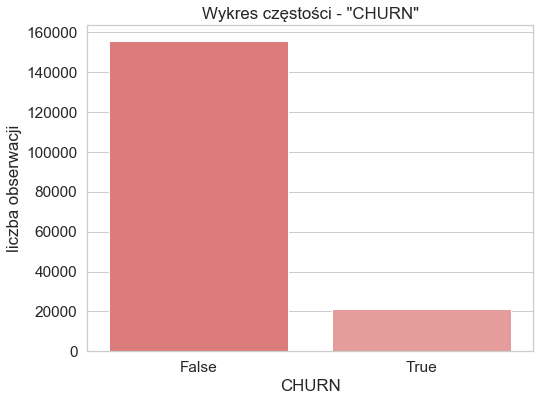

In [34]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4, style="whitegrid")
sns.countplot(df['CHURN'], palette = ['#eb6c6a', '#f0918f']).set(title = 'Wykres częstości - "CHURN"', xlabel = 'CHURN', ylabel = 'liczba obserwacji')
plt.show()


In [35]:
total=df['CHURN'].count()
churnNumber=df['CHURN'].sum()
udzial=round((churnNumber/total)*100,2)
print('Klienci, ktorzy zrezygnowali z usług stanowią {}% spośród całego zbioru danych'.format(udzial))

Klienci, ktorzy zrezygnowali z usług stanowią 11.94% spośród całego zbioru danych


#### 8.3 Analiza zmiennych numerycznych

In [36]:
stats = df.select_dtypes(['int']).describe()
stats = stats.transpose()
stats = stats[['count','std','min','25%','50%','75%','max','mean']]
print(stats)

                        count         std  min   25%    50%    75%      max  \
MONTHS_LIFE          176975.0   10.214316  0.0   6.0   10.0   18.0     86.0   
TOT_MIN_CALL_OUT     176975.0  419.709794  0.0  36.0  138.0  344.0  27308.0   
AVG_MIN_CALL_OUT_3   176975.0  254.680810  0.0  26.0   90.0  217.0  11241.0   
TOT_MIN_IN_ULT_MES   176975.0  103.426071  0.0   7.0   28.0   73.0   6644.0   
AVG_MIN_IN_3         176975.0   24.779255  0.0   0.0    0.0    3.0   2298.0   
ROA_LASTMONTH        176975.0    2.781263  0.0   0.0    0.0    1.0    126.0   
ROACETEL_LAST_MONTH  176975.0   17.570064  0.0   1.0    5.0   13.0    574.0   

                           mean  
MONTHS_LIFE           13.211086  
TOT_MIN_CALL_OUT     269.953044  
AVG_MIN_CALL_OUT_3   169.882158  
TOT_MIN_IN_ULT_MES    59.033943  
AVG_MIN_IN_3           6.346574  
ROA_LASTMONTH          0.794609  
ROACETEL_LAST_MONTH   11.011148  


W przypadku wszystkich zmiennych (prócz TOT_MIN_IN_ULT_MES) ze zmiennych średnia jest wieksza niz mediana, co świadczy o dużej skosnosci rozkładu. Tym problem zajmiemy się w dalszej części.
     

Potwierdźmy czy zmienne opisane są rozkładem normalnym testem na rozkład normalny:

In [37]:
kolumny_int=df.select_dtypes(include=['int']).columns
kolumny_object_category=df.select_dtypes(include=['object','category']).columns

for i in range(0,len(kolumny_int)):
    if(scipy.stats.normaltest(df[kolumny_int[i]])[1] < 0.05):
        print("Hipoteza zerowa odrzucona, przyjęta alternatywna: zmienna %r nie pochodzi z rozkładu normalnego." % kolumny_int[i] )
    else:
        print('Hipoteza zerowa przyjęta. Zmienna %r pochodzi z rozkładu normalnego.'% kolumny_int[i])
    

Hipoteza zerowa odrzucona, przyjęta alternatywna: zmienna 'MONTHS_LIFE' nie pochodzi z rozkładu normalnego.
Hipoteza zerowa odrzucona, przyjęta alternatywna: zmienna 'TOT_MIN_CALL_OUT' nie pochodzi z rozkładu normalnego.
Hipoteza zerowa odrzucona, przyjęta alternatywna: zmienna 'AVG_MIN_CALL_OUT_3' nie pochodzi z rozkładu normalnego.
Hipoteza zerowa odrzucona, przyjęta alternatywna: zmienna 'TOT_MIN_IN_ULT_MES' nie pochodzi z rozkładu normalnego.
Hipoteza zerowa odrzucona, przyjęta alternatywna: zmienna 'AVG_MIN_IN_3' nie pochodzi z rozkładu normalnego.
Hipoteza zerowa odrzucona, przyjęta alternatywna: zmienna 'ROA_LASTMONTH' nie pochodzi z rozkładu normalnego.
Hipoteza zerowa odrzucona, przyjęta alternatywna: zmienna 'ROACETEL_LAST_MONTH' nie pochodzi z rozkładu normalnego.


Zmienna: MONTHS_LIFE


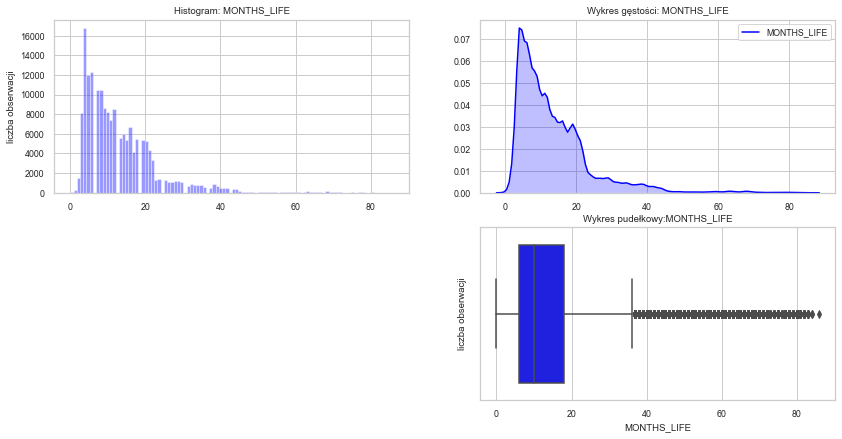

Zmienna: TOT_MIN_CALL_OUT


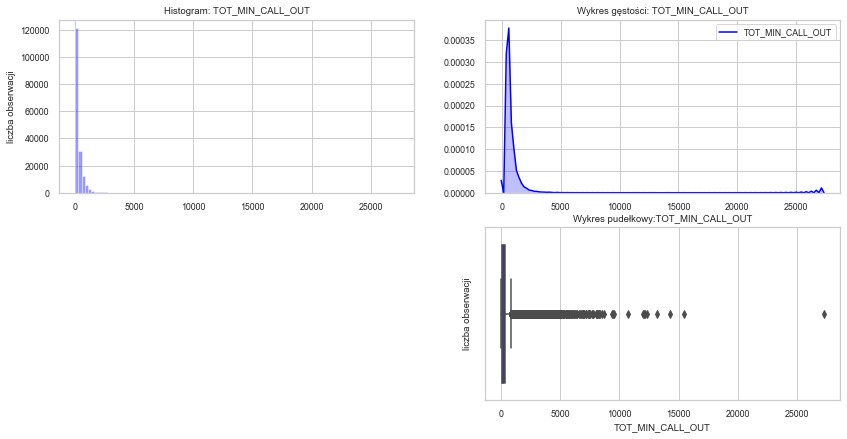

Zmienna: AVG_MIN_CALL_OUT_3


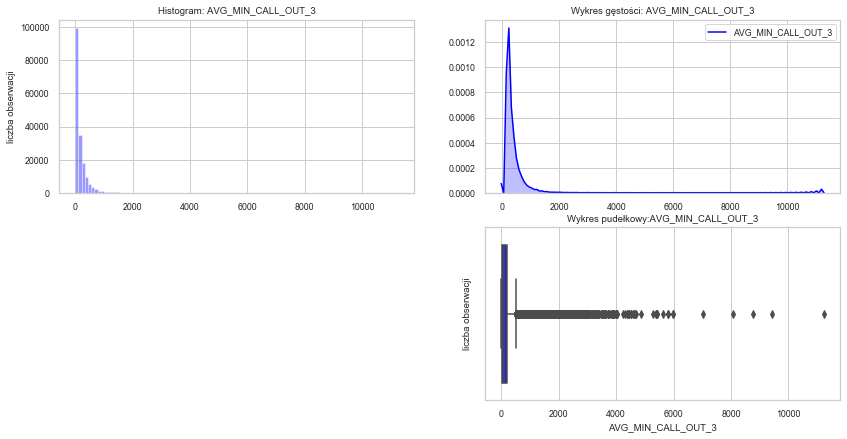

Zmienna: TOT_MIN_IN_ULT_MES


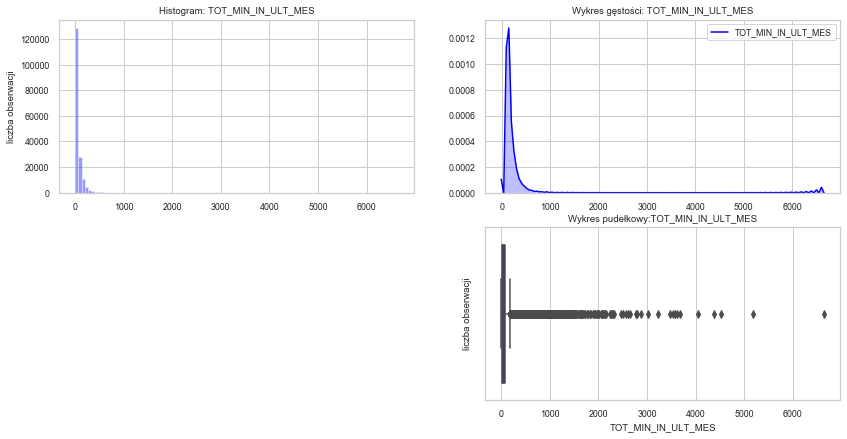

Zmienna: AVG_MIN_IN_3


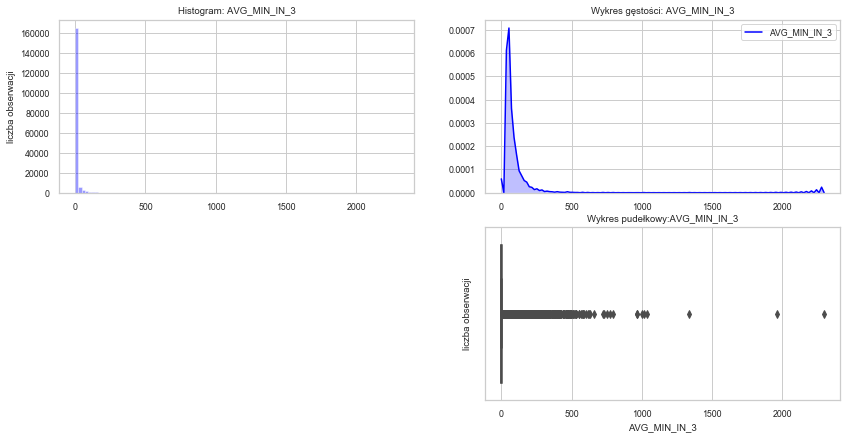

Zmienna: ROA_LASTMONTH


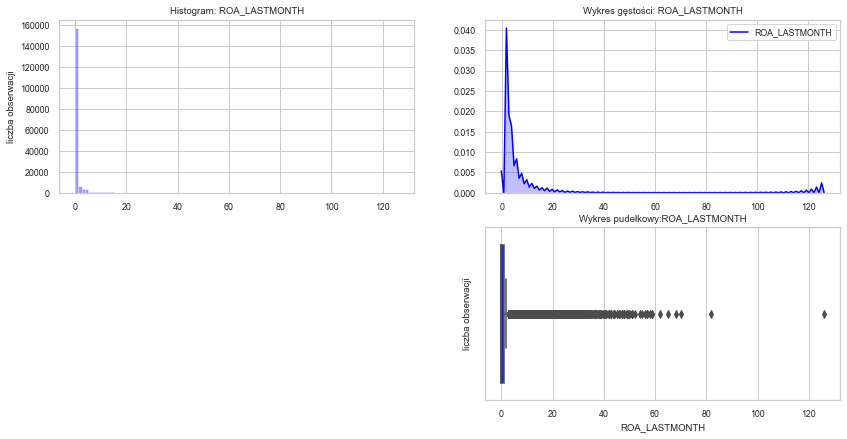

Zmienna: ROACETEL_LAST_MONTH


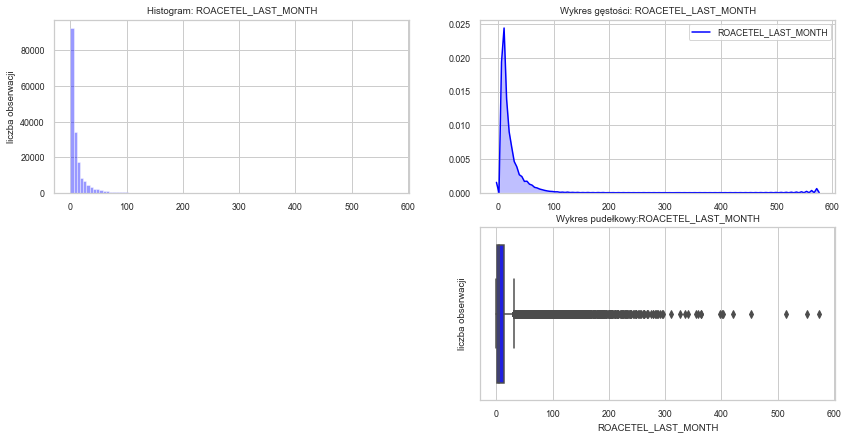

In [38]:
for i in range(0,len(kolumny_int)):
    print ('Zmienna: '+ kolumny_int[i])
    
    plt.figure(figsize=(14,7))
    sns.set(font_scale=0.8, style="whitegrid")
    plt.subplot(2, 2, 1)
    sns.distplot(df[kolumny_int[i]], kde = False, bins = 100, color = 'blue').set(title = 'Histogram: '+kolumny_int[i], xlabel = '', ylabel = 'liczba obserwacji')
    
    plt.subplot(2, 2, 2)
    sns.kdeplot(df[kolumny_int[i]], shade = True, color = 'blue').set(title = 'Wykres gęstości: ' + kolumny_int[i],  ylabel = ' ')
   
    plt.subplot(2, 2, 4)
    sns.boxplot(df[kolumny_int[i]], color ='blue').set(title = 'Wykres pudełkowy:' + kolumny_int[i] ,  ylabel = 'liczba obserwacji')
    plt.show()

Zmienna **MONTHS_LIFE** ma najbardziej zblizony rozkład do rozkładu normalnego, choć przeważa asymetria prawostronna.  Hipoteza zerowa o normalności rozkładu została jednak odrzucona.  
<BR>
Zmienne **TOT_MIN_CALL_OUT, AVG_MIN_CALL_OUT_3, TOT_MIN_IN_ULT_MES, AVG_MIN_IN_3, ROA_LASTMOTNH, ROACETEL_LAST_MONTH** to głównie rozkłady gamma, z bardzo dużą asymetrią prawostronną.

Sprawdźmy teraz w jaki sposób wygląda reprezentacji zmiennych ciągłych w zależności od zmiennej celu 'CHURN':

Wykres częstosci i wąsatego pudełka dla zmiennej: MONTHS_LIFE


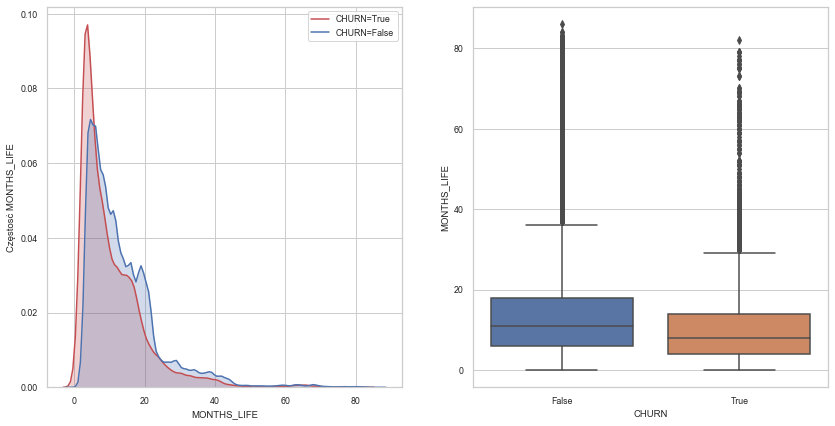

Wykres częstosci i wąsatego pudełka dla zmiennej: TOT_MIN_CALL_OUT


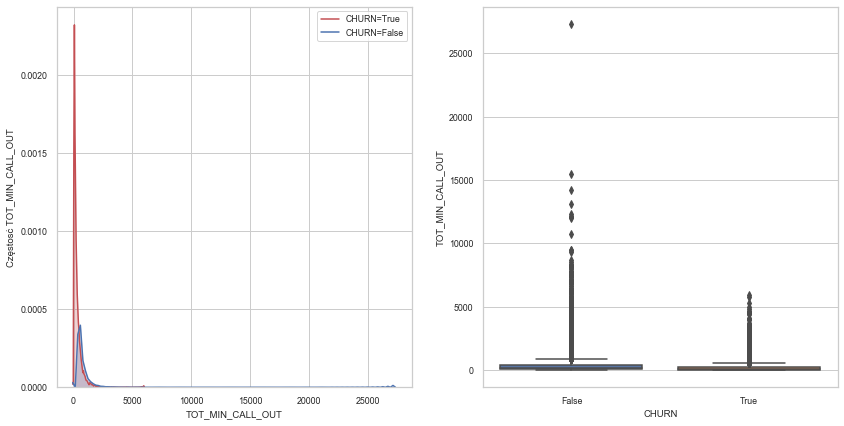

Wykres częstosci i wąsatego pudełka dla zmiennej: AVG_MIN_CALL_OUT_3


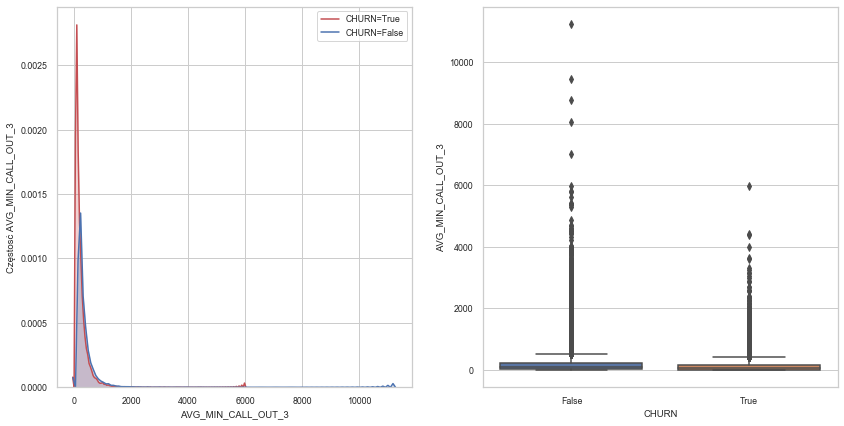

Wykres częstosci i wąsatego pudełka dla zmiennej: TOT_MIN_IN_ULT_MES


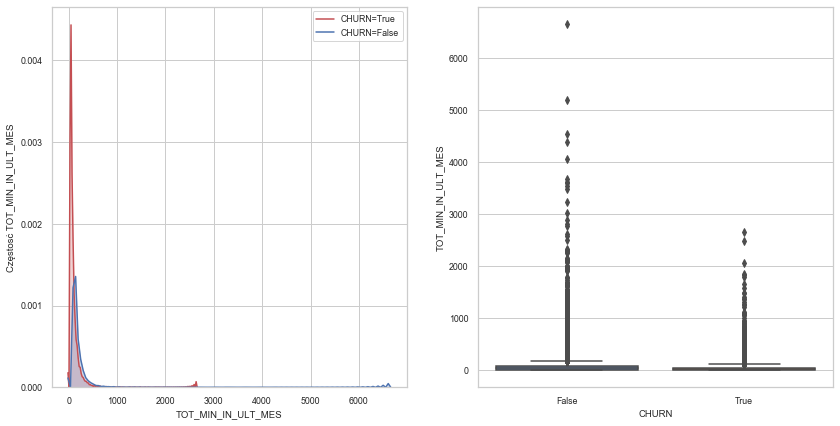

Wykres częstosci i wąsatego pudełka dla zmiennej: AVG_MIN_IN_3


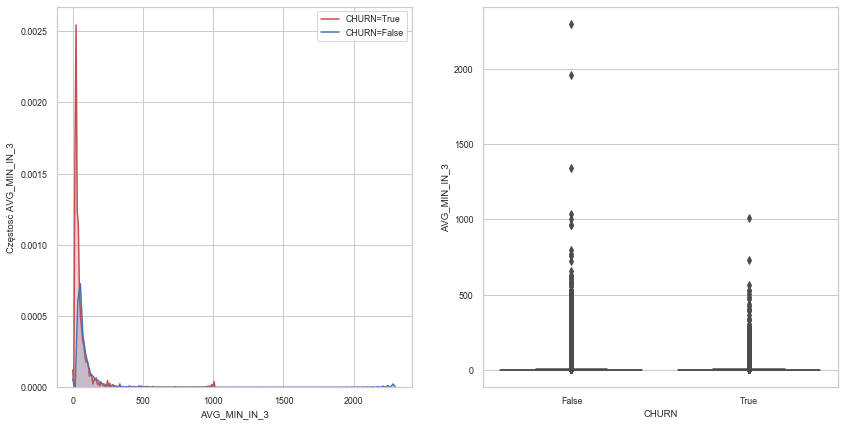

Wykres częstosci i wąsatego pudełka dla zmiennej: ROA_LASTMONTH


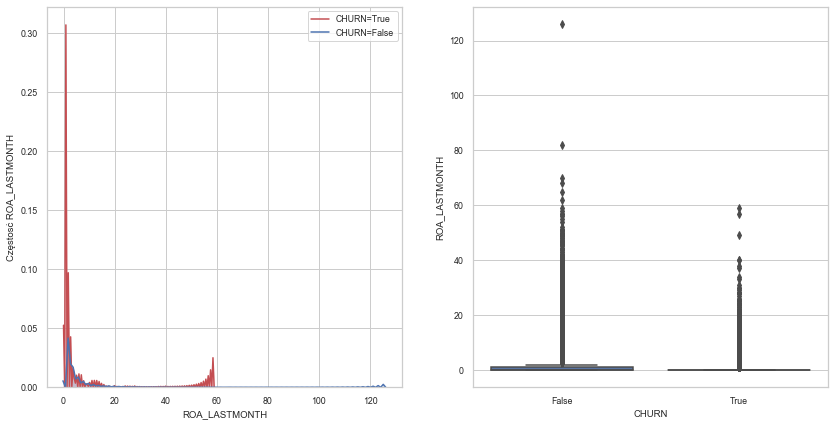

Wykres częstosci i wąsatego pudełka dla zmiennej: ROACETEL_LAST_MONTH


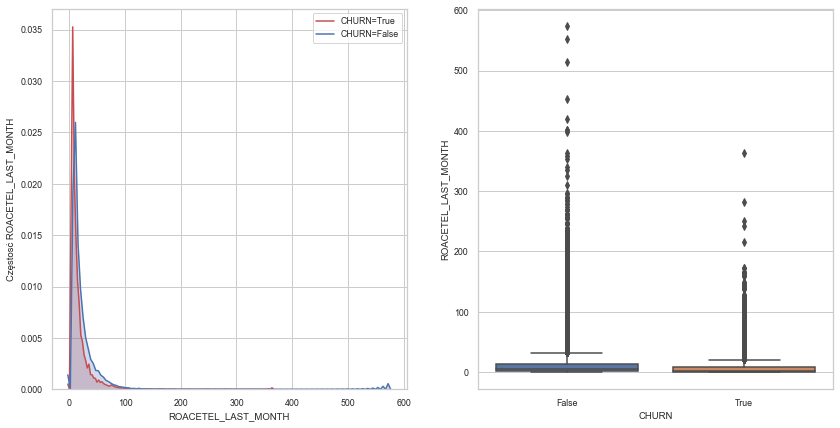

In [39]:
    #MONTH_LIFE
    print('Wykres częstosci i wąsatego pudełka dla zmiennej: ' +kolumny_int[0] )
    plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    #print("Wykres częstosci dla: "+kolumny_int[0])
    sns.kdeplot(df.loc[(df['CHURN']==1), kolumny_int[0]], color='r', shade=True, Label='CHURN=True')  
    sns.kdeplot(df.loc[(df['CHURN']==0), kolumny_int[0]], color='b', shade=True, Label='CHURN=False')  
    plt.xlabel(kolumny_int[0]) 
    plt.ylabel('Częstosć '+kolumny_int[0]) 
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='CHURN', y=kolumny_int[0], data=df)
    plt.show()
    
    #TOT_MIN_CALL_OUT
    print('Wykres częstosci i wąsatego pudełka dla zmiennej: ' +kolumny_int[1] )
    plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df.loc[(df['CHURN']==1), kolumny_int[1]], color='r', shade=True, Label='CHURN=True')  
    sns.kdeplot(df.loc[(df['CHURN']==0), kolumny_int[1]], color='b', shade=True, Label='CHURN=False')  
    plt.xlabel(kolumny_int[1]) 
    plt.ylabel('Częstosć '+kolumny_int[1])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='CHURN', y=kolumny_int[1], data=df)
    plt.show()
    
    
#AVG_MIN_CALL_OUT_3
    print('Wykres częstosci i wąsatego pudełka dla zmiennej: ' +kolumny_int[2] )
    plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df.loc[(df['CHURN']==1), kolumny_int[2]], color='r', shade=True, Label='CHURN=True')  
    sns.kdeplot(df.loc[(df['CHURN']==0), kolumny_int[2]], color='b', shade=True, Label='CHURN=False')  
    plt.xlabel(kolumny_int[2]) 
    plt.ylabel('Częstosć '+kolumny_int[2])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='CHURN', y=kolumny_int[2], data=df)
    plt.show()
    
#TOT_MIN_IN_ULT_MES
    print('Wykres częstosci i wąsatego pudełka dla zmiennej: ' +kolumny_int[3] )
    plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df.loc[(df['CHURN']==1), kolumny_int[3]], color='r', shade=True, Label='CHURN=True')  
    sns.kdeplot(df.loc[(df['CHURN']==0), kolumny_int[3]], color='b', shade=True, Label='CHURN=False')  
    plt.xlabel(kolumny_int[3]) 
    plt.ylabel('Częstosć '+kolumny_int[3])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='CHURN', y=kolumny_int[3], data=df)
    plt.show()
    
    #AVG_MIN_IN_3
    print('Wykres częstosci i wąsatego pudełka dla zmiennej: ' +kolumny_int[4] )
    plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df.loc[(df['CHURN']==1), kolumny_int[4]], color='r', shade=True, Label='CHURN=True')  
    sns.kdeplot(df.loc[(df['CHURN']==0), kolumny_int[4]], color='b', shade=True, Label='CHURN=False')  
    plt.xlabel(kolumny_int[4]) 
    plt.ylabel('Częstosć '+kolumny_int[4])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='CHURN', y=kolumny_int[4], data=df)
    plt.show()
    
    #ROA_LAST_MONTH
    print('Wykres częstosci i wąsatego pudełka dla zmiennej: ' +kolumny_int[5] )
    plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df.loc[(df['CHURN']==1), kolumny_int[5]], color='r', shade=True, Label='CHURN=True')  
    sns.kdeplot(df.loc[(df['CHURN']==0), kolumny_int[5]], color='b', shade=True, Label='CHURN=False')  
    plt.xlabel(kolumny_int[5]) 
    plt.ylabel('Częstosć '+kolumny_int[5])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='CHURN', y=kolumny_int[5], data=df)
    plt.show()
    
    #ROACATEL_LAST_MONTH
    print('Wykres częstosci i wąsatego pudełka dla zmiennej: ' +kolumny_int[6] )
    plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df.loc[(df['CHURN']==1), kolumny_int[6]], color='r', shade=True, Label='CHURN=True')  
    sns.kdeplot(df.loc[(df['CHURN']==0), kolumny_int[6]], color='b', shade=True, Label='CHURN=False')  
    plt.xlabel(kolumny_int[6]) 
    plt.ylabel('Częstosć '+kolumny_int[6])
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x='CHURN', y=kolumny_int[6], data=df)
    plt.show()
    

WNIOSKI:
- Zmienna '**MONTHS_LIFE**': To częściej klienci z krótszym stażem decydują się na rezygnację z usług operatora: niższa średnia, miediana, kwartyl_1, kwartyl_3
- Zmienne **TOT_MIN_CALL_OUT, AVG_MIN_CALL_OUT_3, AVG_MIN_CALL_OUT_3, TOT_MIN_IN_ULT_MES, AVG_MIN_IN_3**: Rozkłady bardzo skośne, przy tym wyglądają bardzo podobnie tzn: klienci decydujacy sie na churn to klienci, ktorzy raczej wykonują mniej połączeń wychodzących i przychodzących, w każdej ze zmiennych duża ilość obserowacji odstających.
- Zmienne **ROA_LAST_MONTH i ROACETEL_LAST_MONTH**: tutaj różnice między TRUE i FALSE są bardziej subtelne, ale też zaznacza się podobna tendencja, iż klienci churn`ujący mniej dzwonią i mniej razy transmitują dane w roamingu krajowym. Również bardzo duża ilość obserwacji odstających, przy czym wydaje się większa dla CHURN=FALSE.

    

#### 8.4 Skośność zmiennych numerycznych

Na powyższych wykresach widać wyraźnie, iż wszystkie zmienne numeryczne są prawostronnie skośne:

In [40]:
df.select_dtypes(include=['int']).skew()

MONTHS_LIFE             2.129899
TOT_MIN_CALL_OUT        7.154081
AVG_MIN_CALL_OUT_3      5.859125
TOT_MIN_IN_ULT_MES      9.976527
AVG_MIN_IN_3           17.857123
ROA_LASTMONTH           8.136035
ROACETEL_LAST_MONTH     4.813719
dtype: float64

W celu zmniejszenia skośności zlogarytmizujmy powyższe zmienne:

In [41]:
df["MONTHS_LIFE_log"] = df["MONTHS_LIFE"].map(lambda i: np.log(i) if i > 0 else 0)
df["TOT_MIN_CALL_OUT_log"] = df["TOT_MIN_CALL_OUT"].map(lambda i: np.log(i) if i > 0 else 0)
df["AVG_MIN_CALL_OUT_3_log"] = df["AVG_MIN_CALL_OUT_3"].map(lambda i: np.log(i) if i > 0 else 0)
df["TOT_MIN_IN_ULT_MES_log"] = df["TOT_MIN_IN_ULT_MES"].map(lambda i: np.log(i) if i> 0 else 0)
df["AVG_MIN_IN_3_log"] = df["AVG_MIN_IN_3"].map(lambda i: np.log(i) if i > 0 else 0)
df["ROA_LASTMONTH_log"] = df["ROA_LASTMONTH"].map(lambda i: np.log(i) if i > 0 else 0)
df["ROACETEL_LAST_MONTH_log"] = df["ROACETEL_LAST_MONTH"].map(lambda i: np.log(i) if i > 0 else 0)

Sprawdźmy:

In [42]:
df.select_dtypes(include=['float64']).skew()

MONTHS_LIFE_log            0.029268
TOT_MIN_CALL_OUT_log      -0.933379
AVG_MIN_CALL_OUT_3_log    -0.834642
TOT_MIN_IN_ULT_MES_log    -0.415442
AVG_MIN_IN_3_log           1.742241
ROA_LASTMONTH_log          3.689651
ROACETEL_LAST_MONTH_log    0.252455
dtype: float64

Po zlograrytmizowaniu zmiennych skośność wyraźnie się zmniejszyła, ale w dalszym ciągu jest dosyć silna.  Tym zajmę się na dalszym etapie.

#### 8.5 Analiza zmiennych kategorycznych

- Wykres kolumnowy i wykres kolumnowy100%:

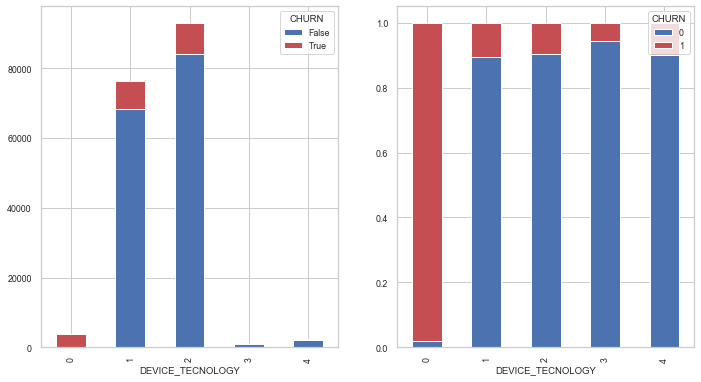

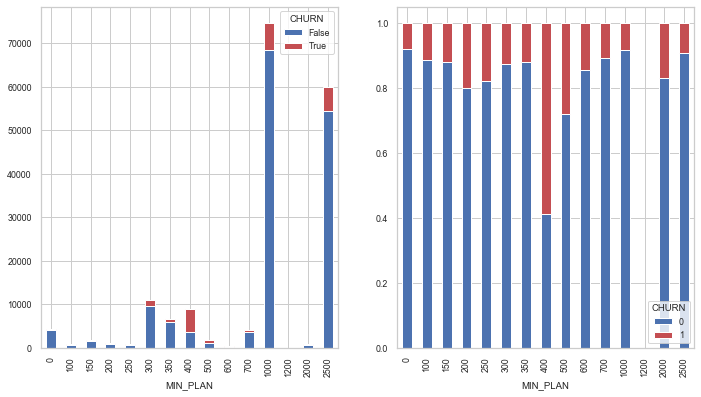

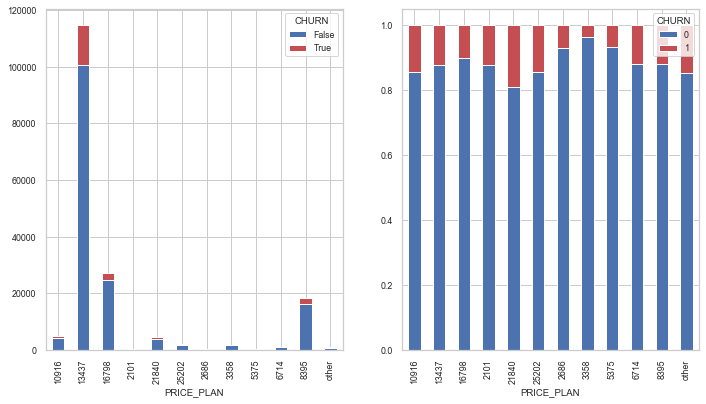

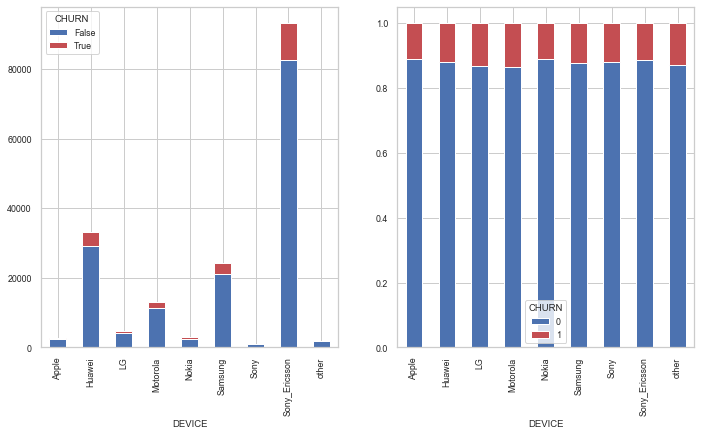

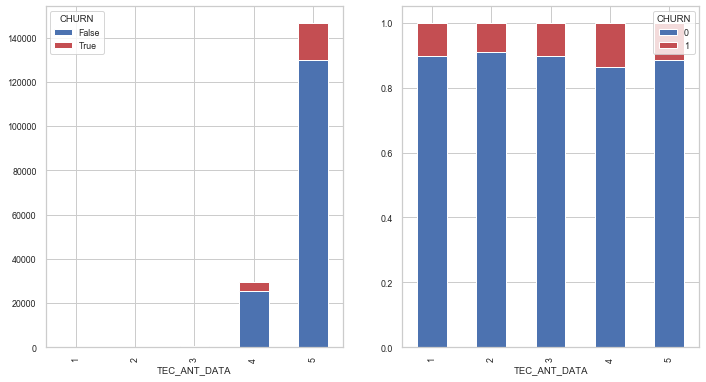

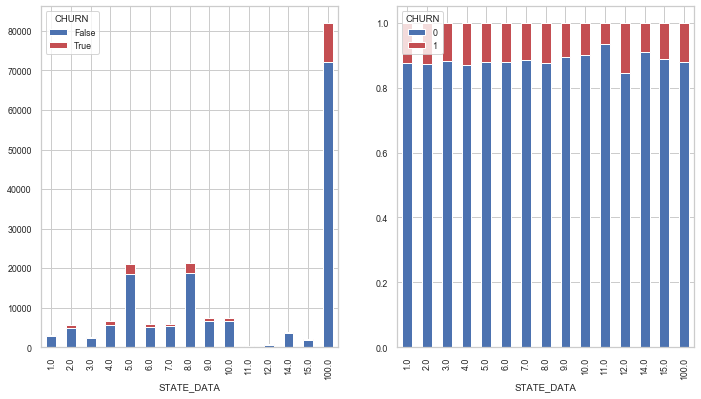

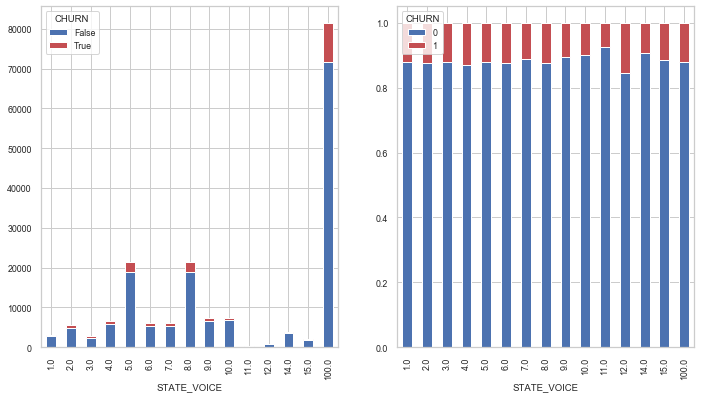

In [43]:
sns.set(font_scale=0.8, style="whitegrid", rc={'figure.figsize':(11.7,6.27)})
     
for i in range(0,len(kolumny_object_category)):
    if (kolumny_object_category[i]):
        f, axes = plt.subplots(1, 2)
        df_5=df.groupby([kolumny_object_category[i],'CHURN']).size().reset_index().pivot(columns='CHURN', index=kolumny_object_category[i], values=0)
      
        
        #zamieniam df_5 z wartosci liczbowych na procentowe i zapisuje je w nowym df_6
        
        df_5[0]=df_5[0].fillna(0)
        df_6=df_5.copy()
        
        colors = {'0':'red', '1':'blue'}
        colormap = np.array(['b', 'r'])
        categories = np.array([0,1])
        
        df_6['0']=df_6[0]/(df_6[0]+df_6[1])
        df_6['1']=df_6[1]/(df_6[0]+df_6[1])
        df_6=df_6.drop([0,1], axis=1)
        
            
        muted=['#4878CF', '#6acc65']
        newPal=dict(false=muted[0], true=muted[1])
        
        df_5.plot(kind='bar', stacked=True, ax=axes[0], color=colormap[categories])
        df_6.plot(kind='bar', stacked=True, ax=axes[1], color=colormap[categories])
        

- Zestawienie ilościowo-procentowe:

In [44]:
def frequency_share_function(data_frame, column_name):
    dfDeviceCount=data_frame.groupby([column_name,'CHURN']).size().reset_index().pivot(columns='CHURN', index=column_name, values=0)
    dfDeviceCount[1]=dfDeviceCount[1].fillna(0)
    dfDeviceCount[0]=dfDeviceCount[0].fillna(0)
    dfDeviceCount['SUM']=dfDeviceCount[0].fillna(0)+dfDeviceCount[1].fillna(0)
    dfDeviceCount['CHURN_SHARE__PER_LINE']=round(dfDeviceCount[1]/(dfDeviceCount[0]+dfDeviceCount[1]),2)
    dfDeviceCount['CHURN_SHARE_TOTAL']=round(dfDeviceCount[1]/dfDeviceCount[1].sum(),2)
    dfDeviceCount=dfDeviceCount.sort_values(by=['SUM'], ascending=False)
    print('Tabela udziałów procentowych dla zmiennej: '+column_name)
    print(dfDeviceCount)
    print('************************************************')

frequency_share_function(df,'DEVICE_TECNOLOGY')
frequency_share_function(df,'MIN_PLAN')
frequency_share_function(df,'PRICE_PLAN')
frequency_share_function(df,'DEVICE')
frequency_share_function(df,'TEC_ANT_DATA')
frequency_share_function(df,'STATE_DATA')
frequency_share_function(df,'STATE_VOICE')

Tabela udziałów procentowych dla zmiennej: DEVICE_TECNOLOGY
CHURN             False  True    SUM  CHURN_SHARE__PER_LINE  CHURN_SHARE_TOTAL
DEVICE_TECNOLOGY                                                              
2                 84035  9060  93095                   0.10               0.43
1                 68482  8008  76490                   0.10               0.38
0                    73  3759   3832                   0.98               0.18
4                  2223   246   2469                   0.10               0.01
3                  1026    63   1089                   0.06               0.00
************************************************
Tabela udziałów procentowych dla zmiennej: MIN_PLAN
CHURN       False    True      SUM  CHURN_SHARE__PER_LINE  CHURN_SHARE_TOTAL
MIN_PLAN                                                                    
1000      68462.0  6172.0  74634.0                   0.08               0.29
2500      54470.0  5438.0  59908.0                   0.

- Wnioski:  
 -Zmienna **DEVICE_TECNOLOGY**: 98% procent klientów posiadających telefon z technologią 0 dokonało churn`u  
 -Zmienna **MIN_PLAN**: Klienci z 400 minutami oraz 500 (mniej liczna kategoria) wyróżniają się negatywnie pod kątem odsetka odejść.  
 -Zmienna **PRICE_PLAN**: Dużych różnic nie widać, jedynie klienci w ceną '21840' stanowiący 4% całej grupy w większym odestku niż średnia decydują się na odejście.  
 -Zmienna **Device**: brak istotnych różnic.  
 -Zmienna **TEC_ANT_DATA**: Klienci z technologią transmisji głosu '4' stanowią liczną grupę (19%), a odsetek rezygnacji w tej grupie jest nieznacznie wyższy niż średnia i wynosi 14%.  
 -Zmienna **STATE_DATA** i **STATE_VOICE**: brak istotnych różnic.  

#### 8.6 Korelacja zmiennych numerycznych ze zmienną celu:

W przypadku zmiennych numerycznych zostanie wykorzystana korelacja Spearmana, gdyż nie posiada ona założenia co do normalności rozkładu, a zgodnie z przeprowadzonymi testami odrzucona została hipoteza co normalności rozkładów w przypadku wszystkich badanych zmiennych.
   

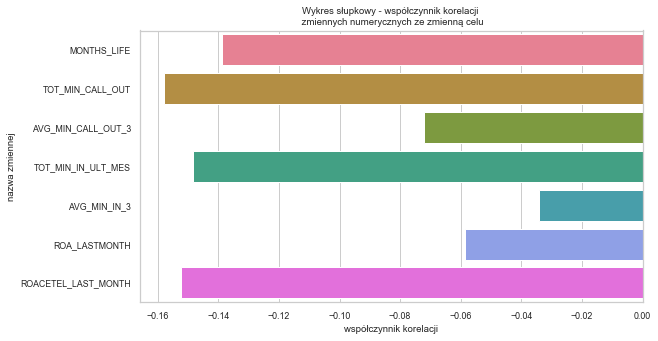

In [45]:
spearman_tablica=[]
wspSpearmana=[]
for i in range(0,len(kolumny_int)):
    spearman=scipy.stats.spearmanr(df[kolumny_int[i]],df['CHURN'])
    spearman_tablica.append(spearman)
    wspSpearmana.append(spearman_tablica[i][0])
    

zmienna2=list(zip(list(kolumny_int), wspSpearmana )) #lista z nazwą zmiennych numerycznych i współczynnikiem
dfWspSpearmana=pd.DataFrame(zmienna2, columns=['dane','wsp_spearmana'])
sns.set(font_scale=0.8, style="whitegrid")
plt.figure(figsize=(9,5))
sns.barplot(data = dfWspSpearmana, x = 'wsp_spearmana', y = 'dane', palette = 'husl').set(title = 'Wykres słupkowy - współczynnik korelacji \n zmiennych numerycznych ze zmienną celu', xlabel = 'współczynnik korelacji', ylabel = 'nazwa zmiennej')
plt.show()

WNIOSEK: Ze wszystkimi zmiennymi nieznaczna korelacja negatywna

#### 8.7 Korelacja zmiennych kategorycznych ze zmienną celu:

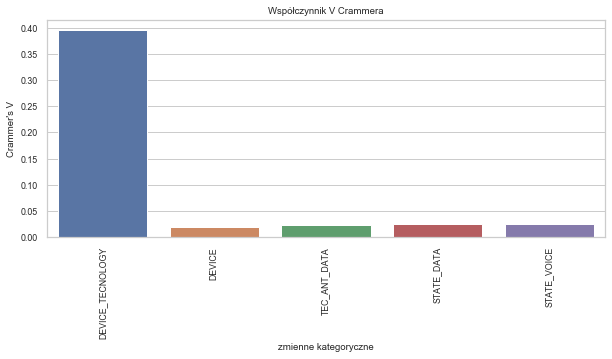

In [46]:
def CramersV(tab):
    a = scipy.stats.chi2_contingency(tab)[0]/sum(tab.sum())
    b = min(tab.shape[0]-1, tab.shape[1]-1,)
    return(np.sqrt(a/b))
def CalculateCrammersV(tab):
    ret = []
    for m in tab:
        row = []
        for n in tab:
            cross_tab = pd.crosstab(tab[m].values,tab[n].values)
            row.append(CramersV(cross_tab))
        ret.append(row)
    return pd.DataFrame(ret, columns=tab.columns, index=tab.columns)


cat_y = pd.DataFrame(CalculateCrammersV(df[['CHURN','DEVICE_TECNOLOGY','DEVICE','TEC_ANT_DATA','STATE_DATA','STATE_VOICE']]).iloc[0,1:])
cat_y.reset_index(inplace = True)

plt.figure(figsize=(10,4))
sns.set(font_scale=0.8, style="whitegrid")
plt.xticks(rotation=90)
sns.barplot(data = cat_y, y = 'CHURN', x = 'index').set(title = 'Współczynnik V Crammera', xlabel = 'zmienne kategoryczne', ylabel = 'Crammer\'s V')
plt.show()

Potwierdzenie wniosku ze wcześniejszego etapu eksploracji danych: Zmienna DEVICE_TECNOLOGY w istotny sposób skorelowana jest ze zmienną celu

#### 8.8 Zaleznosci miedzy zmiennymi kategorycznymi

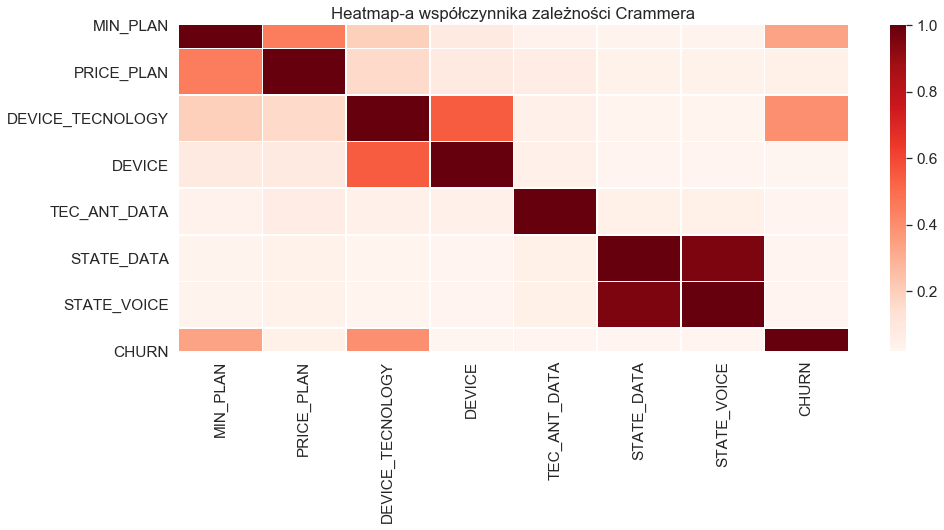

In [47]:
crammer = CalculateCrammersV(df[['MIN_PLAN', 'PRICE_PLAN','DEVICE_TECNOLOGY','DEVICE','TEC_ANT_DATA','STATE_DATA','STATE_VOICE', 'CHURN']])

plt.figure(figsize=(15,6))
sns.set(font_scale=1.4)
sns.heatmap(crammer, cmap="Reds", linewidths=.5).set(title='Heatmap-a współczynnika zależności Crammera')
plt.show()

Występują zależności, których należało się spodziewać:  
- cena planu taryfowego skorelowana jest z ilością minut w planie (PRICE_PLAN vs. MIN_PLAN)
- Technologia telefonu skorelowana jest z modelem aparatu (DEVICE_TECNOLOGY vs.DEVICE)
- Lokalizacja do transmisji danych skorelowana jest z lokalizacją do transmisji głosu (STATE_DATA vs. STATE_VOICE)

### 9. Usunięcie danych odstających

- **Przegląd zmiennych przed/po zlogarytmowniu**:

Zanim zajmę się usuwaniem danych odstających, przyjrzymy się chwile zmiennym które zostały zlogarytmizowane i w jaki sposób to wpłynęło na redukcję outlierów:

Zmienna:MONTHS_LIFE


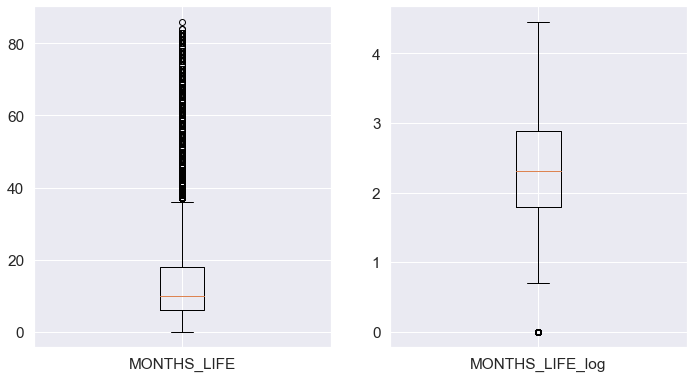

Zmienna:TOT_MIN_CALL_OUT


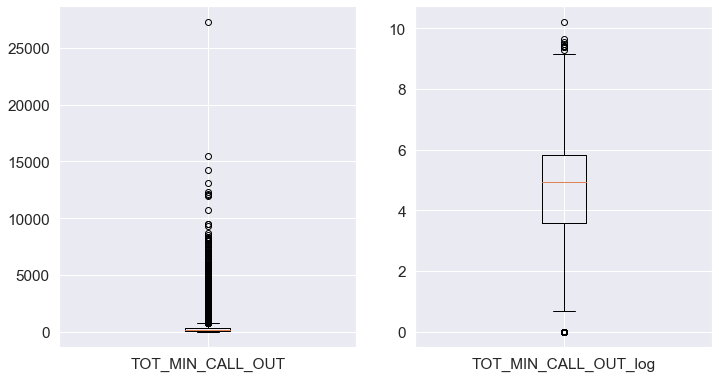

Zmienna:AVG_MIN_CALL_OUT_3


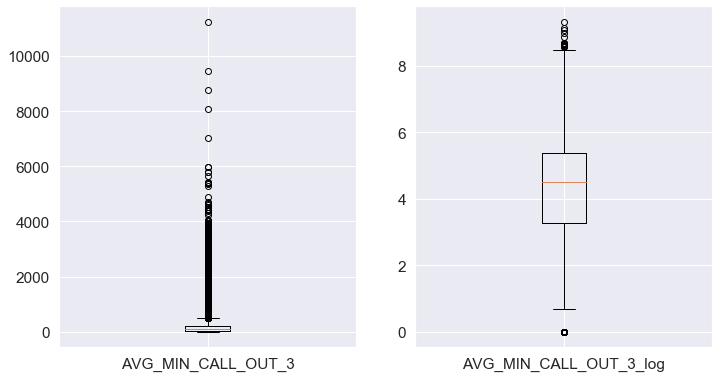

Zmienna:TOT_MIN_IN_ULT_MES


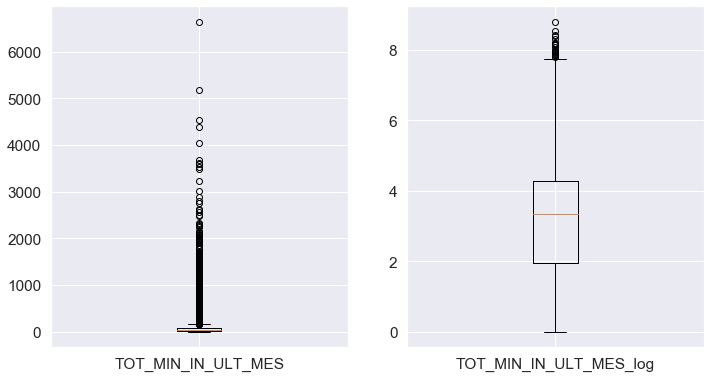

Zmienna:AVG_MIN_IN_3


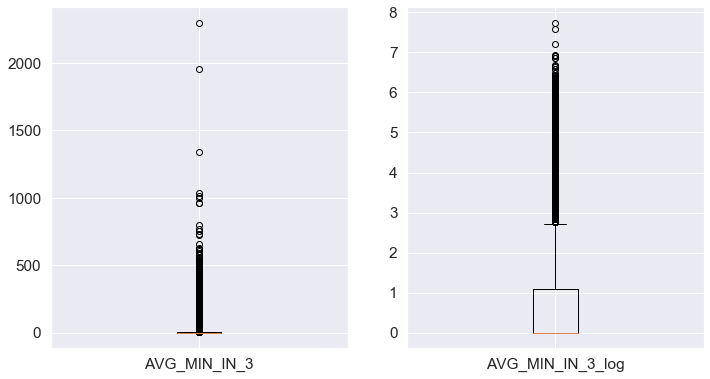

Zmienna:ROA_LASTMONTH


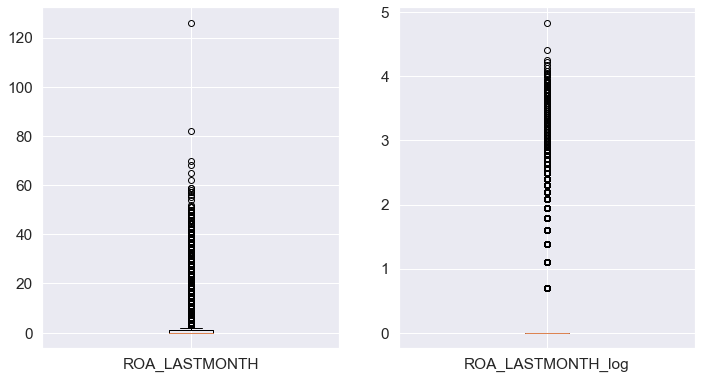

Zmienna:ROACETEL_LAST_MONTH


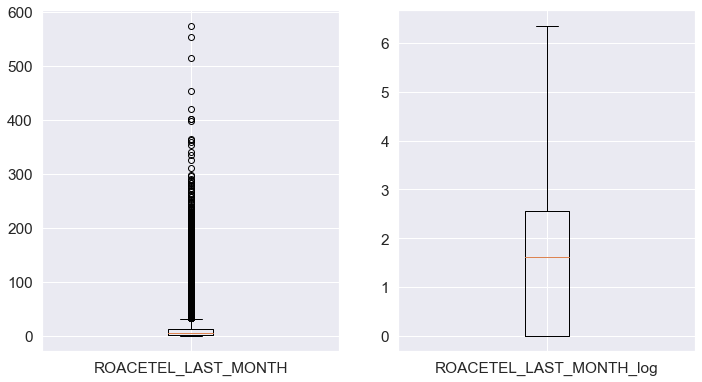

In [48]:
### rysowanie boxplotu zlogarytmizowanych zmiennych
NumericalColumns_log=['MONTHS_LIFE_log', 'TOT_MIN_CALL_OUT_log', 'AVG_MIN_CALL_OUT_3_log', 'TOT_MIN_IN_ULT_MES_log', 'AVG_MIN_IN_3_log', 'ROA_LASTMONTH_log', 'ROACETEL_LAST_MONTH_log']
NumericalColumns_not_log=['MONTHS_LIFE','TOT_MIN_CALL_OUT','AVG_MIN_CALL_OUT_3','TOT_MIN_IN_ULT_MES','AVG_MIN_IN_3','ROA_LASTMONTH','ROACETEL_LAST_MONTH']

for i in range(0,len(NumericalColumns_not_log)):
    print("Zmienna:"+ NumericalColumns_not_log[i])
    plt.subplot(1, 2, 1)
    plt.boxplot(df[NumericalColumns_not_log[i]])
    plt.xticks([1], [NumericalColumns_not_log[i]])
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df[NumericalColumns_log[i]])
    plt.xticks([1], [NumericalColumns_log[i]])
    plt.show()

W przypadku większosci zmiennych zlogarytmizowanie przyniosło pozytywny skutek- zmienijszyła się ilość wartość odstających.
Usuńmy zatem kolumny pierwotne (przed zlogarytmizowaniem), gdyż nie będą potrzebne do dalszej analizy:

In [49]:
df1=df.copy()
df1.columns

    
df1.drop(['MONTHS_LIFE','TOT_MIN_CALL_OUT', 'AVG_MIN_CALL_OUT_3',  'TOT_MIN_IN_ULT_MES','AVG_MIN_IN_3','ROA_LASTMONTH','ROACETEL_LAST_MONTH',], axis=1, inplace=True)


- **Usuwanie braków danych:**

Usuńmy 2.5% danych z każdej strony oraz zweryfikujmy jaka część danych została usunięta:

In [50]:
lower_bound = df1.quantile(0.025)
upper_bound = df1.quantile(0.975)
num_of_outl = (df[upper_bound.index] > upper_bound).sum()
outliers = pd.DataFrame({'upper_bound':upper_bound, 'num_of_outliers_U':num_of_outl})
outliers.drop(['CHURN'], inplace = True, axis = 0)

for row in outliers.iterrows():
    df2 = df1[df1[row[0]] <= row[1]['upper_bound']]
    print(df2.shape)

print('Łącznie usunięto {} rekordów.'.format(df.shape[0]-df2.shape[0]))

    


(172698, 15)
(172547, 15)
(172560, 15)
(172572, 15)
(172617, 15)
(172724, 15)
(172567, 15)
Łącznie usunięto 4408 rekordów.


### 10. Transformacja zmiennych kategorycznych na zmienne zero-jedynkowe

Niektóre metody uczenia maszynowego wymagają, aby zmienne kategoryczne (jakościowe) były przekształcane na zmienne typu zero-jedynkowego. W związku z tym dokonajmy takiej transpozycji:

In [51]:
df3=pd.get_dummies(df2) 
print('Liczba kolumn po transformacji na dummy_variables wynosi:'+format(df3.shape[1]))

print('Lista kolumn po transformacji na dummy_variables: \n'+format(df3.columns))

Liczba kolumn po transformacji na dummy_variables wynosi:85
Lista kolumn po transformacji na dummy_variables: 
Index(['CHURN', 'MONTHS_LIFE_log', 'TOT_MIN_CALL_OUT_log',
       'AVG_MIN_CALL_OUT_3_log', 'TOT_MIN_IN_ULT_MES_log', 'AVG_MIN_IN_3_log',
       'ROA_LASTMONTH_log', 'ROACETEL_LAST_MONTH_log', 'DEVICE_TECNOLOGY_0',
       'DEVICE_TECNOLOGY_1', 'DEVICE_TECNOLOGY_2', 'DEVICE_TECNOLOGY_3',
       'DEVICE_TECNOLOGY_4', 'MIN_PLAN_0', 'MIN_PLAN_100', 'MIN_PLAN_150',
       'MIN_PLAN_200', 'MIN_PLAN_250', 'MIN_PLAN_300', 'MIN_PLAN_350',
       'MIN_PLAN_400', 'MIN_PLAN_500', 'MIN_PLAN_600', 'MIN_PLAN_700',
       'MIN_PLAN_800', 'MIN_PLAN_1000', 'MIN_PLAN_1200', 'MIN_PLAN_2000',
       'MIN_PLAN_2500', 'PRICE_PLAN_10916', 'PRICE_PLAN_13437',
       'PRICE_PLAN_16798', 'PRICE_PLAN_2101', 'PRICE_PLAN_21840',
       'PRICE_PLAN_25202', 'PRICE_PLAN_2686', 'PRICE_PLAN_3358',
       'PRICE_PLAN_5375', 'PRICE_PLAN_6714', 'PRICE_PLAN_8395',
       'PRICE_PLAN_other', 'DEVICE_Apple', 'DEVICE_

Celem uniknięcia wspólniowości między danymi usunę po jednej z kolumn w każdej rodzinie zmiennych.  
Nie spowoduje to utraty informacji, ponieważ w schemacie z nadmiarowymi kolumnami jeden ze wskaźników musi być niezerowy. Innymi słowy jeśli w danej kolumnie występowała zmienna kategoryczna która przyjmowała np. 3 wartości ('bezrobotny', 'student', 'pracujący') to nawet jeśli przypadkowo zostanie usunięta kolumna ze zmienną  zawierająca wartość '1', pozostała reprezentacja dwóch '0' będzie musiała oznaczać, że pod usuniętą kolumną występowała '1'

In [52]:
df3.drop(['DEVICE_TECNOLOGY_1', 'MIN_PLAN_0', 'PRICE_PLAN_10916', 'DEVICE_Apple', 'TEC_ANT_DATA_1', 'STATE_DATA_1.0', 'STATE_VOICE_1.0' ], axis=1, inplace=True)


### 11. Wybór zmiennych do modelu

#### 11.1 Selekcja zmiennych według modelu selekcji według drzewa decyzyjnego

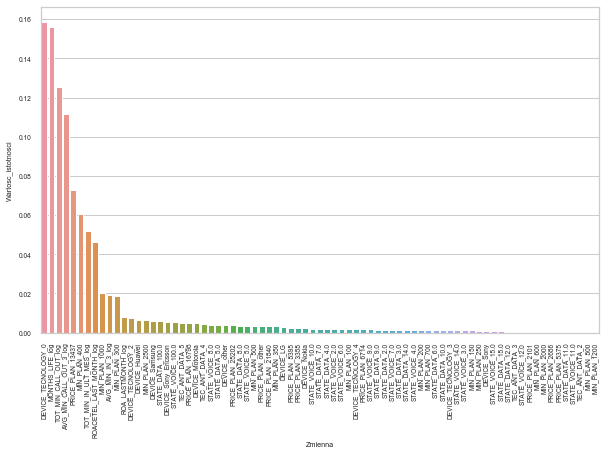

In [53]:
#Usunięcie zmiennej celu i przepisanie jej do innej zmiennej
df3["CHURN"] = df3["CHURN"].astype('bool')
X= df3.drop('CHURN',axis=1).reset_index(drop = True)
y= df3['CHURN'].reset_index(drop = True)

#Selekcji według drzewa decyzyjnego
model_selector_dtc = DecisionTreeClassifier()
model_selector_dtc.fit(X, y)
dt = pd.DataFrame({"Zmienna" : X.columns,
              "Wartosc_istotnosci": model_selector_dtc.feature_importances_})
dt=dt.sort_values(by=['Wartosc_istotnosci'], ascending=False)
plt.figure(figsize=(10,6))
sns.set(font_scale=0.6, style="whitegrid")
ax = sns.barplot(x="Zmienna", y="Wartosc_istotnosci", data=dt)
for label in ax.get_xticklabels():
    label.set_rotation(90)


Wydrukujmy zmienne, które mają wartość istotności powyżej 0.01:

In [54]:
dt[dt.Wartosc_istotnosci>0.01]

,Zmienna,Wartosc_istotnosci
7,DEVICE_TECNOLOGY_0,0.158571
0,MONTHS_LIFE_log,0.156288
1,TOT_MIN_CALL_OUT_log,0.125390
2,AVG_MIN_CALL_OUT_3_log,0.111823
26,PRICE_PLAN_13437,0.072861
17,MIN_PLAN_400,0.060456
3,TOT_MIN_IN_ULT_MES_log,0.052136
6,ROACETEL_LAST_MONTH_log,0.046077
22,MIN_PLAN_1000,0.020273
4,AVG_MIN_IN_3_log,0.019133


#### 11.2 Selekcja zmiennych według modelu Las losowy – random forest

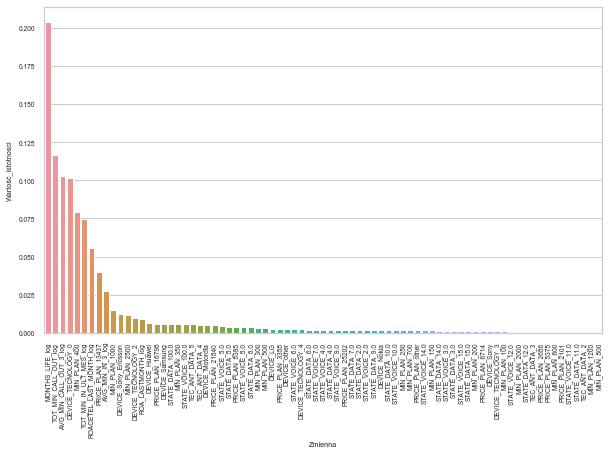

In [55]:
model_selector_rfc = RandomForestClassifier(n_estimators=100)
model_selector_rfc.fit(X, y)
rf = pd.DataFrame({"Zmienna" : X.columns,
              "Wartość_istotnosci": model_selector_rfc.feature_importances_})
rf=rf.sort_values(by=['Wartość_istotnosci'], ascending=False)

plt.figure(figsize=(10,6))
sns.set(font_scale=0.6, style="whitegrid")
ax = sns.barplot(x="Zmienna", y="Wartość_istotnosci", data=rf)
for label in ax.get_xticklabels():
    label.set_rotation(90)

Wydrukujmy zmienne, które mają wartość istotności powyżej 0.01:

In [56]:
rf[rf.Wartość_istotnosci>0.01]

,Zmienna,Wartość_istotnosci
0,MONTHS_LIFE_log,0.204008
1,TOT_MIN_CALL_OUT_log,0.116794
2,AVG_MIN_CALL_OUT_3_log,0.102780
7,DEVICE_TECNOLOGY_0,0.101522
17,MIN_PLAN_400,0.079014
3,TOT_MIN_IN_ULT_MES_log,0.074606
6,ROACETEL_LAST_MONTH_log,0.055298
26,PRICE_PLAN_13437,0.039882
4,AVG_MIN_IN_3_log,0.027478
22,MIN_PLAN_1000,0.014870


Jak widać obie metody wskazały prawie identyczny zestaw istotnych zmiennych.  
Do dalszych celów posłużmy się zmiennymi wskazanymi przez **las losowy.**

In [57]:
df4=df3[[
'MONTHS_LIFE_log',
'TOT_MIN_CALL_OUT_log',
'DEVICE_TECNOLOGY_0',
'AVG_MIN_CALL_OUT_3_log',
'MIN_PLAN_400',
'TOT_MIN_IN_ULT_MES_log',
'ROACETEL_LAST_MONTH_log',
'PRICE_PLAN_13437',
'AVG_MIN_IN_3_log',
'MIN_PLAN_1000',
'MIN_PLAN_2500',
'DEVICE_Sony_Ericsson',
'CHURN'
        ]].copy()

### 12. Skalowanie danych

$\;\;\;$ Pozostawione w zbiorze zmienne numeryczne zawierają zestaw danych o różnej wielkości, jednostkach i zakresie. 
Większość algorytmów uczenia maszynowego wykorzystuje odległość euklidesową. Dlatego jedna cecha, która wyraża się w bardzo 
dużej wielkości (liczbie), może wpłynąć na przewidywanie o wiele bardziej niż równie ważną cechę.
Wiele metod uczenia maszynowego wymaga lub jest bardziej skutecznych, jeśli atrybuty danych mają tę samą skalę. 
  
- **Skalowanie robust:**
RobustScaler używa używa rozstępu międzykwartylnego, jest on bardziej odpowiedni dla sytuacji, gdy dane są odstające.

Wzór:
xi–Q1(x)) / (Q3(x)–Q1(x)  
<font size="1">źródło: http://enroute.pl/skalowanie-danych/ </font>

In [58]:
from sklearn.preprocessing import RobustScaler
robust=RobustScaler()

df4[['MONTHS_LIFE_log']] = robust.fit_transform(df4[['MONTHS_LIFE_log']])
df4[['TOT_MIN_CALL_OUT_log']] = robust.fit_transform(df4[['TOT_MIN_CALL_OUT_log']])
df4[['AVG_MIN_CALL_OUT_3_log']] = robust.fit_transform(df4[['AVG_MIN_CALL_OUT_3_log']])
df4[['TOT_MIN_IN_ULT_MES_log']] = robust.fit_transform(df4[['TOT_MIN_IN_ULT_MES_log']])
df4[['ROACETEL_LAST_MONTH_log']] = robust.fit_transform(df4[['ROACETEL_LAST_MONTH_log']])
df4[['AVG_MIN_IN_3_log']] = robust.fit_transform(df4[['AVG_MIN_IN_3_log']])

## 13. Modelowanie

### 13.1 Podział zbioru na część testową i walidacyjną

$\;\;\;$Po dotychczasowych przekształceniach danych zacznijmy od sprawdzenia odsetka klientów (w całym zbiorze danych), którzy zrezygnowali z usług operatora:

In [59]:
odsetek_1="{:.2%}".format(round(len(df4[(df4['CHURN']==1)].index)/(len(df4[(df4['CHURN']==0)].index) + len(df4[(df4['CHURN']==1)].index) ),4))
print('Odsetek klientow ze znacznikiem CHURN: '+ odsetek_1)

Odsetek klientow ze znacznikiem CHURN: 12.08%


$\;\;\;$12,08% znacza, iż zbiór danych jest **niewłaściwie zbalansowany**.  
<BR>
$\;\;\;$ By dany model mógł właściwie nauczyć się rozpoznać klientów churn`ujących należy zwiększyć udział tychże klientów w zbiorze trenującym. Standardowe algorytmy uczące zakładają równoważną ilość danych w zbiorze. Gdbyśmy nie dokonali takiego działania to nasz model wytrenowałby się świetnie, ale odkrywając  klientów którzy **nie zrezygnowali** z usług operatora- bo oni stanowi w naszym zbiorze prawie 88% przypadków. A nie o to nam chodzi. 
<BR>

$\;\;\;$ **Technika syntetycznej odpróbkowania mniejszościowego (SMOTE)** jest techniką statystyczną zwiększającą liczbę przypadków w zestawie danych w zrównoważony sposób. Moduł działa, generując nowe wystąpienia z istniejących przypadków mniejszości, które podano jako dane wejściowe. SMOTE pobiera cały zestaw danych jako dane wejściowe, ale zwiększa wartość procentową tylko przypadków mniejszościowych. Nowe wystąpienia nie są jedynie kopiami istniejących przypadków mniejszości. Zamiast tego algorytm pobiera próbki przestrzeni funkcji dla każdej klasy docelowej i jej najbliższych sąsiadów. Następnie algorytm generuje nowe przykłady, które łączą funkcje przypadku docelowego z funkcjami jego sąsiadów. Takie podejście zwiększa funkcje dostępne dla każdej klasy i sprawia, że przykłady są bardziej ogólne.  
<font size="1">źródło: https://docs.microsoft.com/pl-pl/azure/machine-learning/algorithm-module-reference/smote</font>


Biorąc powyższe pod uwagę podzielmy zbiór danych w proporcji 70%-próba trenująca, 30%=próba testowa.

In [60]:
y = df4.CHURN # kopiuje zmienną celu do osobnej zmiennej i usuwam ją ze zbioru
df4.drop('CHURN', axis = 1, inplace = True) #usuniecie zmiennej churn ze zbioru

X_train, X_test, y_train, y_test = train_test_split(df4, y, test_size=0.3, random_state=0, stratify = y)

print('Zbiór X treningowy (X_train): ',X_train.shape)
print('Zbiór X testowy (X_test):    ', X_test.shape)
print('Zbiór y treningowy (y_train): ', y_train.shape)
print('Zbiór y testowy (y_test):    ', y_test.shape)
print(' ')

print("Przed OverSampling w zbiorze treningowym (y_train) ilosc '1': wynosi {}".format(sum(y_train==1)))
print("Przed OverSampling w zbiorze treningowym (y_train)  ilosc '0': wynosi {} \n".format(sum(y_train==0)))

Zbiór X treningowy (X_train):  (120796, 12)
Zbiór X testowy (X_test):     (51771, 12)
Zbiór y treningowy (y_train):  (120796,)
Zbiór y testowy (y_test):     (51771,)
 
Przed OverSampling w zbiorze treningowym (y_train) ilosc '1': wynosi 14587
Przed OverSampling w zbiorze treningowym (y_train)  ilosc '0': wynosi 106209 



Za pomocą metody **SMOTE**  zwiększmy liczbę przypadków '0'  w zbiorze trenującym do ilości występowania '1':

In [61]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=10, m_neighbors='deprecated', out_step='deprecated', kind='deprecated', svm_estimator='deprecated', n_jobs=1, ratio=None)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


print('Po przepróbkowaniu SMOTE rozmiar zbioru train_X_res wynosi: {}'.format(X_train_res.shape))
print('Po przepróbkowaniu SMOTE rozmiar zbioru train_y_res wynosi: {} \n'.format(y_train_res.shape))

print("Po przepróbkowaniu SMOTE ilość '1' w zbiorze y_train_res wynosi teraz: {}".format(sum(y_train_res==1)))
print("Po przepróbkowaniu SMOTE ilość '0' w zbiorze y_train_res wynosi teraz: {}\n".format(sum(y_train_res==0)))

print("Rozmiar zbioru testowego: X_test  się nie zmienił i wynosi: {}".format(X_test.shape ))
print("Ilosc wystąpien '1' w zbiorze testowym (y_test) wynosi: {}".format(sum(y_test==1)))
print("Ilosc wystąpien '0' w zbiorze testowym (y_test) wynosi: {}".format(sum(y_test==0)))

Po przepróbkowaniu SMOTE rozmiar zbioru train_X_res wynosi: (212418, 12)
Po przepróbkowaniu SMOTE rozmiar zbioru train_y_res wynosi: (212418,) 

Po przepróbkowaniu SMOTE ilość '1' w zbiorze y_train_res wynosi teraz: 106209
Po przepróbkowaniu SMOTE ilość '0' w zbiorze y_train_res wynosi teraz: 106209

Rozmiar zbioru testowego: X_test  się nie zmienił i wynosi: (51771, 12)
Ilosc wystąpien '1' w zbiorze testowym (y_test) wynosi: 6252
Ilosc wystąpien '0' w zbiorze testowym (y_test) wynosi: 45519


### 13.2 Regresja Logistyczna

W chwili obecnej dane mamy podzielone na zbiór trenujący i testowy. 
<BR>  
Nauka modelu na jednym zbiorze trenującym i badanie jego wydajności na jednym zbiorze testowym może
doprowadzić do uzyskania istotnie różnych wyników- stosując nawet ten sam algorytm. Innymi słowy, dokładność uzyskana w jednym teście bardzo różni się od dokładności uzyskanej w innym zestawie testowym
przy użyciu tego samego algorytmu. Rozwiązaniem tego problemu jest użycie **walidacji krzyżowej (K-Fold Cross-Validation)** do oceny wydajności,gdzie K jest dowolną liczbą. Dzielimy dane na porcje K. Z tych porcji K, część zestawów (wszystkie poza jednym, K-1)
jest używana do treningu, podczas gdy pozostały zestaw służy do testowania.  

Algorytm jest szkolony i testowany K razy, za każdym razem, gdy nowy zestaw jest używany jako zestaw testowy,
podczas gdy pozostałe zestawy są używane do treningu.   

**Ostatecznie, wynik walidacji krzyżowej jest średnią wyników uzyskanych na każdym zestawie.**  
<font size="1">źródło: http://enroute.pl/tag/cross-validation/</font>  

Walidację krzyżową zastosujemy w każdym z algorytmów celem zbadania jego stabilności.


In [62]:
from sklearn.model_selection import cross_val_score
model_cv_lr=LogisticRegression(solver='lbfgs', max_iter=120)

#scoring accuracy na danych trenujących
print('******ZBIÓR TRENUJĄCY*******')
accuracy_cv_lr=cross_val_score(model_cv_lr, X_train_res, y_train_res, cv = 10, scoring='accuracy' )
print('Średnie ACCURACY: ' + str(accuracy_cv_lr.mean().round(3)))
print('Odchylenie standardowe ACCURACY: ' + str(accuracy_cv_lr.std().round(3)))
print('Stabilność ACCURACY: ' + str((accuracy_cv_lr.std()*100/accuracy_cv_lr.mean()).round(3)) + '%')
print('-----')

#recall na danych trenujących
recall_cv_lr=cross_val_score(model_cv_lr, X_train_res, y_train_res, cv = 10, scoring='recall' )
print('Średni RECALL: ' + str(recall_cv_lr.mean().round(3)))
print('Odchylenie standardowe RECALL : ' + str(recall_cv_lr.std().round(3)))
print('Stabilność RECALL: ' + str((recall_cv_lr.std()*100/recall_cv_lr.mean()).round(3)) + '%')
print('-----')
#F1 na danych trenujących
F1_cv_lr=cross_val_score(model_cv_lr, X_train_res, y_train_res, cv = 10, scoring='f1' )
print('Średni F1: ' + str(F1_cv_lr.mean().round(3)))
print('Odchylenie standardowe F1 : ' + str(F1_cv_lr.std().round(3)))
print('Stabilność F1: ' + str((F1_cv_lr.std()*100/F1_cv_lr.mean()).round(3)) + '%')
print('-----')
#PRECISION na danych trenujących
PRECISION_cv_lr=cross_val_score(model_cv_lr, X_train_res, y_train_res, cv = 10, scoring='precision' )
print('Średnie PRECISION: ' + str(PRECISION_cv_lr.mean().round(3)))
print('Odchylenie standardowe PRECISION : ' + str(PRECISION_cv_lr.std().round(3)))
print('Stabilność PRECISION: ' + str((PRECISION_cv_lr.std()*100/PRECISION_cv_lr.mean()).round(3)) + '%')
print('-----')

#ROC_AUC na danych trenujących
ROC_AUC_cv_lr=cross_val_score(model_cv_lr, X_train_res, y_train_res, cv = 10, scoring='roc_auc' )
print('Średnie ROC_AUC: ' + str(ROC_AUC_cv_lr.mean().round(3)))
print('Odchylenie standardowe ROC_AUC : ' + str(ROC_AUC_cv_lr.std().round(3)))
print('Stabilność ROC_AUC: ' + str((ROC_AUC_cv_lr.std()*100/ROC_AUC_cv_lr.mean()).round(3)) + '%')
print('-----')


******ZBIÓR TRENUJĄCY*******
Średnie ACCURACY: 0.806
Odchylenie standardowe ACCURACY: 0.003
Stabilność ACCURACY: 0.315%
-----
Średni RECALL: 0.746
Odchylenie standardowe RECALL : 0.005
Stabilność RECALL: 0.681%
-----
Średni F1: 0.794
Odchylenie standardowe F1 : 0.003
Stabilność F1: 0.403%
-----
Średnie PRECISION: 0.848
Odchylenie standardowe PRECISION : 0.002
Stabilność PRECISION: 0.233%
-----
Średnie ROC_AUC: 0.874
Odchylenie standardowe ROC_AUC : 0.003
Stabilność ROC_AUC: 0.315%
-----


Odchylenie standardowe, a przez to miara stabilności (odchylenie/średnia) każdego ze wskaźników jest bliska zeru. Im bliżej zera, tym model jest bardziej stabilny i w wyniki w każdym z 10 podzbiorów są do siebie zbliżone. <BR>

Sprawdźmy model na danych testowych:

******ZBIÓR TESTOWY*******
Confusion matrix
[[39403  6116]
 [ 1515  4737]]
Accuracy w modelu LogisticRegression: 0.853
Recall w modelu LogisticRegression: 0.758
F1 w modelu LogisticRegression: 0.554
Precyzja w modelu LogisticRegression 0.436
ROC_AUC w modelu LogisticRegression: 0.812


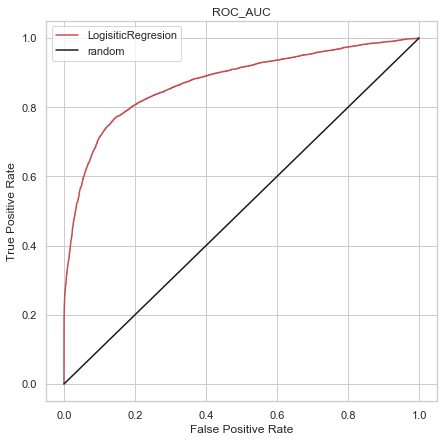

In [63]:
print('******ZBIÓR TESTOWY*******')
model_cv_lr.fit(X_train_res, y_train_res)
y_predicted_lr = model_cv_lr.predict(X_test) #przewidywywane


print("Confusion matrix")
CM_lr = confusion_matrix(y_test, y_predicted_lr)
print(CM_lr)


#Accuracy
ACCURACY_lr=accuracy_score(y_test, y_predicted_lr)
print("Accuracy w modelu LogisticRegression:", round(ACCURACY_lr,3))

#Recall
RECALL_lr=recall_score(y_test, y_predicted_lr)
print("Recall w modelu LogisticRegression:", round(RECALL_lr,3))

#F1
F1_lr=f1_score(y_test, y_predicted_lr)
print("F1 w modelu LogisticRegression:", round(F1_lr, 3) )

#Precision
PRECISION_lr=precision_score(y_test, y_predicted_lr)
print("Precyzja w modelu LogisticRegression", round(PRECISION_lr,3))


#ROC_AUC czyli obszar pod wykresem ROC
ROC_AUC_lr=roc_auc_score(y_test, y_predicted_lr)
print("ROC_AUC w modelu LogisticRegression:", round(ROC_AUC_lr,3))

sns.set(font_scale=1.0, style="whitegrid", rc={'figure.figsize':(7.0,7.0)})
false_positive_rate_lr, true_positive_rate_lr, thresholds_lr = roc_curve(y_test, model_cv_lr.predict_proba(X_test)[:,1])
plt.plot(false_positive_rate_lr, true_positive_rate_lr, 'r-', label='LogisiticRegresion')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.show()

- Jak widać **Accuracy** jest dosyć wysokie, ale w przypadku danych niezbalansowanych (a taki jest zbiór testowy gdzie 88% danych stanowią '0') nie jest do żadne osiągnięcie i nie oznacza, że model ma wysoką jakość. Inne miary lepiej odzwierciedlają jakość modelu.
- **Wysokie RECALL i niska precyzja** oznacza model dobrze wskazał klientów typu '1' (w 75%), ale w swoim zbiorze zawiera też wielu takich, którzy w rzeczywistości okazali się klientami typu '0' (~44%).
- **F1** czyli miara, która balansuje oba powyższe wskaźniki

### 13.3 Drzewa decyzyjne

******ZBIÓR TRENUJĄCY*******
Średnie ACCURACY: 0.808
Odchylenie standardowe ACCURACY: 0.006
Stabilność ACCURACY: 0.76%
-----
Średni RECALL: 0.682
Odchylenie standardowe RECALL : 0.013
Stabilność RECALL: 1.957%
-----
Średni F1: 0.781
Odchylenie standardowe F1 : 0.009
Stabilność F1: 1.142%
-----
Średnie PRECISION: 0.912
Odchylenie standardowe PRECISION : 0.002
Stabilność PRECISION: 0.267%
-----
Średnie ROC_AUC: 0.852
Odchylenie standardowe ROC_AUC : 0.007
Stabilność ROC_AUC: 0.777%
-----
******ZBIÓR TESTOWY*******
Confusion matrix
[[42537  2982]
 [ 2093  4159]]
Accuracy w modelu DecisionTreeClassifier:  0.902
Recall w modelu DecisionTreeClassifier:  0.665
F1 w modelu DecisionTreeClassifier:  0.621
Precyzja w modelu DecisionTreeClassifier:  0.582
ROC_AUC w modelu DecisionTreeClassifier:  0.8


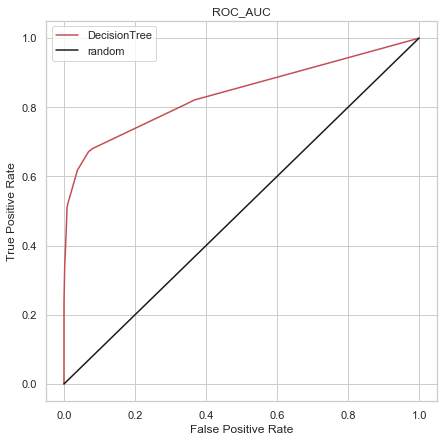

In [64]:
model_cv_dtc = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_leaf= 50,
    max_depth=5
        )

#scoring accuracy na danych trenujących
print('******ZBIÓR TRENUJĄCY*******')
accuracy_cv_dtc=cross_val_score(model_cv_dtc, X_train_res, y_train_res, cv = 10, scoring='accuracy' )
print('Średnie ACCURACY: ' + str(accuracy_cv_dtc.mean().round(3)))
print('Odchylenie standardowe ACCURACY: ' + str(accuracy_cv_dtc.std().round(3)))
print('Stabilność ACCURACY: ' + str((accuracy_cv_dtc.std()*100/accuracy_cv_dtc.mean()).round(3)) + '%')
print('-----')

#scoring recall na danych trenujących
recall_cv_dtc=cross_val_score(model_cv_dtc, X_train_res, y_train_res, cv = 10, scoring='recall' )
print('Średni RECALL: ' + str(recall_cv_dtc.mean().round(3)))
print('Odchylenie standardowe RECALL : ' + str(recall_cv_dtc.std().round(3)))
print('Stabilność RECALL: ' + str((recall_cv_dtc.std()*100/recall_cv_dtc.mean()).round(3)) + '%')
print('-----')
#scoring F1 na danych trenujących
F1_cv_dtc=cross_val_score(model_cv_dtc, X_train_res, y_train_res, cv = 10, scoring='f1' )
print('Średni F1: ' + str(F1_cv_dtc.mean().round(3)))
print('Odchylenie standardowe F1 : ' + str(F1_cv_dtc.std().round(3)))
print('Stabilność F1: ' + str((F1_cv_dtc.std()*100/F1_cv_dtc.mean()).round(3)) + '%')
print('-----')
#scoring PRECISION na danych trenujących
PRECISION_cv_dtc=cross_val_score(model_cv_dtc, X_train_res, y_train_res, cv = 10, scoring='precision' )
print('Średnie PRECISION: ' + str(PRECISION_cv_dtc.mean().round(3)))
print('Odchylenie standardowe PRECISION : ' + str(PRECISION_cv_dtc.std().round(3)))
print('Stabilność PRECISION: ' + str((PRECISION_cv_dtc.std()*100/PRECISION_cv_dtc.mean()).round(3)) + '%')
print('-----')

#scoring ROC_AUC na danych trenujących
ROC_AUC_cv_dtc=cross_val_score(model_cv_dtc, X_train_res, y_train_res, cv = 10, scoring='roc_auc' )
print('Średnie ROC_AUC: ' + str(ROC_AUC_cv_dtc.mean().round(3)))
print('Odchylenie standardowe ROC_AUC : ' + str(ROC_AUC_cv_dtc.std().round(3)))
print('Stabilność ROC_AUC: ' + str((ROC_AUC_cv_dtc.std()*100/ROC_AUC_cv_dtc.mean()).round(3)) + '%')
print('-----')

#SPRAWDZENIE JAK MODEL WYPADA NA ZBIORZE TESTOWYM
print('******ZBIÓR TESTOWY*******')
model_cv_dtc.fit(X_train_res, y_train_res)
y_predicted_dtc = model_cv_dtc.predict(X_test) #przewidywywane
	

#confusion matrix
print("Confusion matrix")
CM_dtc = confusion_matrix(y_test, y_predicted_dtc)
print(CM_dtc)


#Accuracy
ACCURACY_dtc=accuracy_score(y_test, y_predicted_dtc)
print("Accuracy w modelu DecisionTreeClassifier: ", round(ACCURACY_dtc,3))

#Recall
RECALL_dtc=recall_score(y_test, y_predicted_dtc)
print("Recall w modelu DecisionTreeClassifier: ", round(RECALL_dtc,3))

#F1
F1_dtc=f1_score(y_test, y_predicted_dtc)
print("F1 w modelu DecisionTreeClassifier: ", round(F1_dtc, 3) )

#Precision
PRECISION_dtc=precision_score(y_test, y_predicted_dtc)
print("Precyzja w modelu DecisionTreeClassifier: ", round(PRECISION_dtc,3))


#ROC_AUC czyli obszar pod wykresem ROC
ROC_AUC_dtc=roc_auc_score(y_test, y_predicted_dtc)
print("ROC_AUC w modelu DecisionTreeClassifier: ", round(ROC_AUC_dtc,3))


sns.set(font_scale=1.0, style="whitegrid", rc={'figure.figsize':(7.0,7.0)})
false_positive_rate_dtc, true_positive_rate_dtc, thresholds_dtc = roc_curve(y_test, model_cv_dtc.predict_proba(X_test)[:,1])
plt.plot(false_positive_rate_dtc, true_positive_rate_dtc, 'r-', label='DecisionTree')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.show()

### 13.4 Random Forest

******ZBIÓR TRENUJĄCY*******
Średnie ACCURACY: 0.858
Odchylenie standardowe ACCURACY: 0.013
Stabilność ACCURACY: 1.49%
-----
Średni RECALL: 0.775
Odchylenie standardowe RECALL : 0.028
Stabilność RECALL: 3.639%
-----
Średni F1: 0.845
Odchylenie standardowe F1 : 0.017
Stabilność F1: 2.034%
-----
Średnie PRECISION: 0.929
Odchylenie standardowe PRECISION : 0.002
Stabilność PRECISION: 0.166%
-----
Średnie ROC_AUC: 0.934
Odchylenie standardowe ROC_AUC : 0.011
Stabilność ROC_AUC: 1.223%
-----
******ZBIÓR TESTOWY*******
Confusion matrix
[[42785  2734]
 [ 1776  4476]]
Accuracy w modelu RandomForest:  0.913
Recall w modelu RandomForest:  0.716
F1 w modelu RandomForest:  0.665
Precyzja w modelu RandomForest:  0.621
ROC_AUC w modelu RandomForest:  0.828


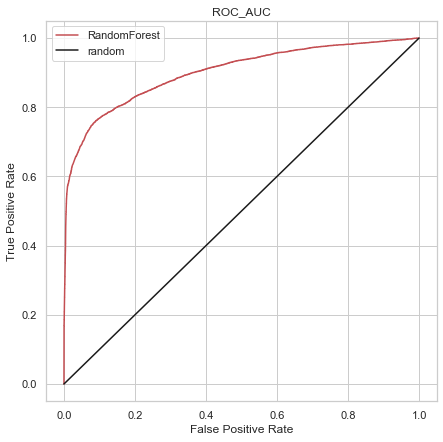

In [65]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model_cv_rfr = RandomForestClassifier(
        n_estimators = 1000,
        random_state = 123,
        max_depth = 9,
        criterion = "gini"
        )

#scoring accuracy na danych trenujących
print('******ZBIÓR TRENUJĄCY*******')
accuracy_cv_rfr=cross_val_score(model_cv_rfr, X_train_res, y_train_res, cv = 10, scoring='accuracy')
print('Średnie ACCURACY: ' + str(accuracy_cv_rfr.mean().round(3)))
print('Odchylenie standardowe ACCURACY: ' + str(accuracy_cv_rfr.std().round(3)))
print('Stabilność ACCURACY: ' + str((accuracy_cv_rfr.std()*100/accuracy_cv_rfr.mean()).round(3)) + '%')
print('-----')

#scoring recall na danych trenujących
recall_cv_rfr=cross_val_score(model_cv_rfr, X_train_res, y_train_res, cv = 10, scoring='recall' )
print('Średni RECALL: ' + str(recall_cv_rfr.mean().round(3)))
print('Odchylenie standardowe RECALL : ' + str(recall_cv_rfr.std().round(3)))
print('Stabilność RECALL: ' + str((recall_cv_rfr.std()*100/recall_cv_rfr.mean()).round(3)) + '%')
print('-----')
#scoring F1 na danych trenujących
F1_cv_rfr=cross_val_score(model_cv_rfr, X_train_res, y_train_res, cv = 10, scoring='f1' )
print('Średni F1: ' + str(F1_cv_rfr.mean().round(3)))
print('Odchylenie standardowe F1 : ' + str(F1_cv_rfr.std().round(3)))
print('Stabilność F1: ' + str((F1_cv_rfr.std()*100/F1_cv_rfr.mean()).round(3)) + '%')
print('-----')
#scoring PRECISION na danych trenujących
PRECISION_cv_rfr=cross_val_score(model_cv_rfr, X_train_res, y_train_res, cv = 10, scoring='precision' )
print('Średnie PRECISION: ' + str(PRECISION_cv_rfr.mean().round(3)))
print('Odchylenie standardowe PRECISION : ' + str(PRECISION_cv_rfr.std().round(3)))
print('Stabilność PRECISION: ' + str((PRECISION_cv_rfr.std()*100/PRECISION_cv_rfr.mean()).round(3)) + '%')
print('-----')

#scoring ROC_AUC na danych trenujących
ROC_AUC_cv_rfr=cross_val_score(model_cv_rfr, X_train_res, y_train_res, cv = 10, scoring='roc_auc' )
print('Średnie ROC_AUC: ' + str(ROC_AUC_cv_rfr.mean().round(3)))
print('Odchylenie standardowe ROC_AUC : ' + str(ROC_AUC_cv_rfr.std().round(3)))
print('Stabilność ROC_AUC: ' + str((ROC_AUC_cv_rfr.std()*100/ROC_AUC_cv_rfr.mean()).round(3)) + '%')
print('-----')


#SPRAWDZENIE JAK MODEL WYPADA NA ZBIORZE TESTOWYM

print('******ZBIÓR TESTOWY*******')
model_cv_rfr.fit(X_train_res, y_train_res)
y_predicted_rfr = model_cv_rfr.predict(X_test) #przewidywywane 
#y_predicted_rfr=np.where(y_predicted_rfr>0.5, 1, 0)	

#confusion matrix

print("Confusion matrix")
CM_rfr = confusion_matrix(y_test, y_predicted_rfr)
print(CM_rfr)


#Accuracy
ACCURACY_rfr=accuracy_score(y_test, y_predicted_rfr)
print("Accuracy w modelu RandomForest: ", round(ACCURACY_rfr,3))

#Recall
RECALL_rfr=recall_score(y_test, y_predicted_rfr)
print("Recall w modelu RandomForest: ", round(RECALL_rfr,3))

#F1
F1_rfr=f1_score(y_test, y_predicted_rfr)
print("F1 w modelu RandomForest: ", round(F1_rfr, 3) )

#Precision
PRECISION_rfr=precision_score(y_test, y_predicted_rfr)
print("Precyzja w modelu RandomForest: ", round(PRECISION_rfr,3))


#ROC_AUC czyli obszar pod wykresem ROC
ROC_AUC_rfr=roc_auc_score(y_test, y_predicted_rfr)
print("ROC_AUC w modelu RandomForest: ", round(ROC_AUC_rfr,3))


sns.set(font_scale=1.0, style="whitegrid", rc={'figure.figsize':(7.0,7.0)})
false_positive_rate_rfr, true_positive_rate_rfr, thresholds_rfr = roc_curve(y_test, model_cv_rfr.predict_proba(X_test)[:,1])
plt.plot(false_positive_rate_rfr, true_positive_rate_rfr, 'r-', label='RandomForest')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.show()

Na danych treningowych wszystkie parametry wyglądają bardzo korzystnie, na zbiorze testowym wynik jest już gorszy- szczególnie w parametrze ACCURACY, który jak widać na danych trenujących miał największe odchylenie standardowe.

### 13.5 Naiwny klasyfikator Bayesowski

******ZBIÓR TRENUJĄCY*******
Średnie ACCURACY: 0.674
Odchylenie standardowe ACCURACY: 0.003
Stabilność ACCURACY: 0.434%
-----
Średni RECALL: 0.386
Odchylenie standardowe RECALL : 0.007
Stabilność RECALL: 1.694%
-----
Średni F1: 0.542
Odchylenie standardowe F1 : 0.006
Stabilność F1: 1.178%
-----
Średnie PRECISION: 0.91
Odchylenie standardowe PRECISION : 0.003
Stabilność PRECISION: 0.331%
-----
Średnie ROC_AUC: 0.832
Odchylenie standardowe ROC_AUC : 0.002
Stabilność ROC_AUC: 0.297%
-----
******ZBIÓR TESTOWY*******
Confusion matrix
[[43756  1763]
 [ 3754  2498]]
Accuracy w modelu GaussianNB 0.893
Recall w modelu GaussianNB 0.4
F1 w modelu GaussianNB 0.475
Precyzja w modelu GaussianNB 0.586
ROC_AUC w modelu GaussianNB 0.68


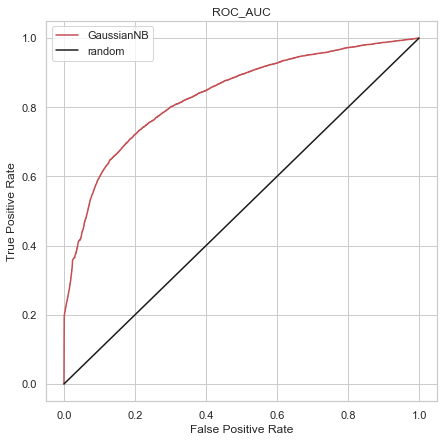

In [66]:
from sklearn.naive_bayes import GaussianNB

model_cv_gnb = GaussianNB()


#scoring accuracy na danych trenujących
print('******ZBIÓR TRENUJĄCY*******')
accuracy_cv_gnb=cross_val_score(model_cv_gnb, X_train_res, y_train_res, cv = 10, scoring='accuracy')
print('Średnie ACCURACY: ' + str(accuracy_cv_gnb.mean().round(3)))
print('Odchylenie standardowe ACCURACY: ' + str(accuracy_cv_gnb.std().round(3)))
print('Stabilność ACCURACY: ' + str((accuracy_cv_gnb.std()*100/accuracy_cv_gnb.mean()).round(3)) + '%')
print('-----')

#scoring recall na danych trenujących
recall_cv_gnb=cross_val_score(model_cv_gnb, X_train_res, y_train_res, cv = 10, scoring='recall' )
print('Średni RECALL: ' + str(recall_cv_gnb.mean().round(3)))
print('Odchylenie standardowe RECALL : ' + str(recall_cv_gnb.std().round(3)))
print('Stabilność RECALL: ' + str((recall_cv_gnb.std()*100/recall_cv_gnb.mean()).round(3)) + '%')
print('-----')
#scoring F1 na danych trenujących
F1_cv_gnb=cross_val_score(model_cv_gnb, X_train_res, y_train_res, cv = 10, scoring='f1' )
print('Średni F1: ' + str(F1_cv_gnb.mean().round(3)))
print('Odchylenie standardowe F1 : ' + str(F1_cv_gnb.std().round(3)))
print('Stabilność F1: ' + str((F1_cv_gnb.std()*100/F1_cv_gnb.mean()).round(3)) + '%')
print('-----')
#scoring PRECISION na danych trenujących
PRECISION_cv_gnb=cross_val_score(model_cv_gnb, X_train_res, y_train_res, cv = 10, scoring='precision' )
print('Średnie PRECISION: ' + str(PRECISION_cv_gnb.mean().round(3)))
print('Odchylenie standardowe PRECISION : ' + str(PRECISION_cv_gnb.std().round(3)))
print('Stabilność PRECISION: ' + str((PRECISION_cv_gnb.std()*100/PRECISION_cv_gnb.mean()).round(3)) + '%')
print('-----')

#scoring ROC_AUC na danych trenujących
ROC_AUC_cv_gnb=cross_val_score(model_cv_gnb, X_train_res, y_train_res, cv = 10, scoring='roc_auc' )
print('Średnie ROC_AUC: ' + str(ROC_AUC_cv_gnb.mean().round(3)))
print('Odchylenie standardowe ROC_AUC : ' + str(ROC_AUC_cv_gnb.std().round(3)))
print('Stabilność ROC_AUC: ' + str((ROC_AUC_cv_gnb.std()*100/ROC_AUC_cv_gnb.mean()).round(3)) + '%')
print('-----')


#SPRAWDZENIE JAK MODEL WYPADA NA ZBIORZE TESTOWYM

print('******ZBIÓR TESTOWY*******')
model_cv_gnb.fit(X_train_res, y_train_res)
y_predicted_gnb = model_cv_gnb.predict(X_test) #przewidywywane 
#y_predicted_gnb=np.where(y_predicted_gnb>0.5, 1, 0)	

#confusion matrix

print("Confusion matrix")
CM_gnb = confusion_matrix(y_test, y_predicted_gnb)
print(CM_gnb)


#Accuracy
ACCURACY_gnb=accuracy_score(y_test, y_predicted_gnb)
print("Accuracy w modelu GaussianNB", round(ACCURACY_gnb,3))

#Recall
RECALL_gnb=recall_score(y_test, y_predicted_gnb)
print("Recall w modelu GaussianNB", round(RECALL_gnb,3))

#F1
F1_gnb=f1_score(y_test, y_predicted_gnb)
print("F1 w modelu GaussianNB", round(F1_gnb, 3) )

#Precision
PRECISION_gnb=precision_score(y_test, y_predicted_gnb)
print("Precyzja w modelu GaussianNB", round(PRECISION_gnb,3))


#ROC_AUC czyli obszar pod wykresem ROC
ROC_AUC_gnb=roc_auc_score(y_test, y_predicted_gnb)
print("ROC_AUC w modelu GaussianNB", round(ROC_AUC_gnb,3))


sns.set(font_scale=1.0, style="whitegrid", rc={'figure.figsize':(7.0,7.0)})
false_positive_rate_gnb, true_positive_rate_gnb, thresholds_gnb = roc_curve(y_test, model_cv_gnb.predict_proba(X_test)[:,1])
plt.plot(false_positive_rate_gnb, true_positive_rate_gnb, 'r-', label='GaussianNB')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.show()

### 13.6 K-najbliższych sąsiadów

******ZBIÓR TRENUJĄCY*******
Średnie ACCURACY: 0.913
Odchylenie standardowe ACCURACY: 0.002
Stabilność ACCURACY: 0.197%
-----
Średni RECALL: 0.95
Odchylenie standardowe RECALL : 0.002
Stabilność RECALL: 0.238%
-----
Średni F1: 0.916
Odchylenie standardowe F1 : 0.002
Stabilność F1: 0.18%
-----
Średnie PRECISION: 0.884
Odchylenie standardowe PRECISION : 0.003
Stabilność PRECISION: 0.328%
-----
Średnie ROC_AUC: 0.965
Odchylenie standardowe ROC_AUC : 0.001
Stabilność ROC_AUC: 0.134%
-----
******ZBIÓR TESTOWY*******
Confusion matrix
[[39829  5690]
 [ 1635  4617]]
Accuracy w modelu KNN 0.859
Recall w modelu KNN 0.738
F1 w modelu KNN 0.558
Precyzja w modelu KNN 0.448
ROC_AUC w modelu KNN 0.807


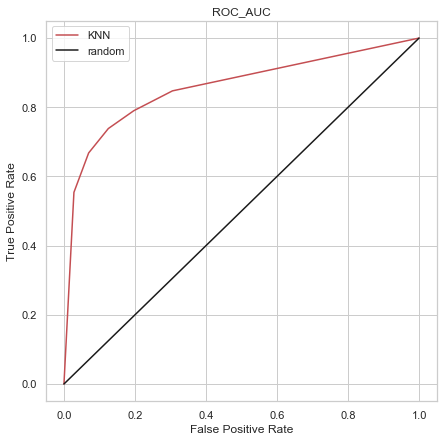

In [67]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_cv_knn = KNeighborsClassifier()


#scoring accuracy na danych trenujących
print('******ZBIÓR TRENUJĄCY*******')
accuracy_cv_knn=cross_val_score(model_cv_knn, X_train_res, y_train_res, cv = 10, scoring='accuracy')
print('Średnie ACCURACY: ' + str(accuracy_cv_knn.mean().round(3)))
print('Odchylenie standardowe ACCURACY: ' + str(accuracy_cv_knn.std().round(3)))
print('Stabilność ACCURACY: ' + str((accuracy_cv_knn.std()*100/accuracy_cv_knn.mean()).round(3)) + '%')
print('-----')

#scoring recall na danych trenujących
recall_cv_knn=cross_val_score(model_cv_knn, X_train_res, y_train_res, cv = 10, scoring='recall' )
print('Średni RECALL: ' + str(recall_cv_knn.mean().round(3)))
print('Odchylenie standardowe RECALL : ' + str(recall_cv_knn.std().round(3)))
print('Stabilność RECALL: ' + str((recall_cv_knn.std()*100/recall_cv_knn.mean()).round(3)) + '%')
print('-----')
#scoring F1 na danych trenujących
F1_cv_knn=cross_val_score(model_cv_knn, X_train_res, y_train_res, cv = 10, scoring='f1' )
print('Średni F1: ' + str(F1_cv_knn.mean().round(3)))
print('Odchylenie standardowe F1 : ' + str(F1_cv_knn.std().round(3)))
print('Stabilność F1: ' + str((F1_cv_knn.std()*100/F1_cv_knn.mean()).round(3)) + '%')
print('-----')
#scoring PRECISION na danych trenujących
PRECISION_cv_knn=cross_val_score(model_cv_knn, X_train_res, y_train_res, cv = 10, scoring='precision' )
print('Średnie PRECISION: ' + str(PRECISION_cv_knn.mean().round(3)))
print('Odchylenie standardowe PRECISION : ' + str(PRECISION_cv_knn.std().round(3)))
print('Stabilność PRECISION: ' + str((PRECISION_cv_knn.std()*100/PRECISION_cv_knn.mean()).round(3)) + '%')
print('-----')

#scoring ROC_AUC na danych trenujących
ROC_AUC_cv_knn=cross_val_score(model_cv_knn, X_train_res, y_train_res, cv = 10, scoring='roc_auc' )
print('Średnie ROC_AUC: ' + str(ROC_AUC_cv_knn.mean().round(3)))
print('Odchylenie standardowe ROC_AUC : ' + str(ROC_AUC_cv_knn.std().round(3)))
print('Stabilność ROC_AUC: ' + str((ROC_AUC_cv_knn.std()*100/ROC_AUC_cv_knn.mean()).round(3)) + '%')
print('-----')


#SPRAWDZENIE JAK MODEL WYPADA NA ZBIORZE TESTOWYM

print('******ZBIÓR TESTOWY*******')
model_cv_knn.fit(X_train_res, y_train_res)
y_predicted_knn = model_cv_knn.predict(X_test) #przewidywywane 
#y_predicted_knn=np.where(y_predicted_knn>0.5, 1, 0)	

#confusion matrix

print("Confusion matrix")
CM_knn = confusion_matrix(y_test, y_predicted_knn)
print(CM_knn)


#Accuracy
ACCURACY_knn=accuracy_score(y_test, y_predicted_knn)
print("Accuracy w modelu KNN", round(ACCURACY_knn,3))

#Recall
RECALL_knn=recall_score(y_test, y_predicted_knn)
print("Recall w modelu KNN", round(RECALL_knn,3))

#F1
F1_knn=f1_score(y_test, y_predicted_knn)
print("F1 w modelu KNN", round(F1_knn, 3) )

#Precision
PRECISION_knn=precision_score(y_test, y_predicted_knn)
print("Precyzja w modelu KNN", round(PRECISION_knn,3))


#ROC_AUC czyli obszar pod wykresem ROC
ROC_AUC_knn=roc_auc_score(y_test, y_predicted_knn)
print("ROC_AUC w modelu KNN", round(ROC_AUC_knn,3))


sns.set(font_scale=1.0, style="whitegrid", rc={'figure.figsize':(7.0,7.0)})
false_positive_rate_knn, true_positive_rate_knn, thresholds_knn = roc_curve(y_test, model_cv_knn.predict_proba(X_test)[:,1])
plt.plot(false_positive_rate_knn, true_positive_rate_knn, 'r-', label='KNN')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.show()

### 13.7 MLP

******ZBIÓR TRENUJĄCY*******
Średnie ACCURACY: 0.857
Odchylenie standardowe ACCURACY: 0.003
Stabilność ACCURACY: 0.404%
-----
Średni RECALL: 0.807
Odchylenie standardowe RECALL : 0.011
Stabilność RECALL: 1.364%
-----
Średni F1: 0.851
Odchylenie standardowe F1 : 0.005
Stabilność F1: 0.575%
-----
Średnie PRECISION: 0.894
Odchylenie standardowe PRECISION : 0.01
Stabilność PRECISION: 1.084%
-----
Średnie ROC_AUC: 0.927
Odchylenie standardowe ROC_AUC : 0.003
Stabilność ROC_AUC: 0.377%
-----
******ZBIÓR TESTOWY*******
Confusion matrix
[[40646  4873]
 [ 1126  5126]]
Accuracy w modelu MLP 0.884
Recall w modelu MLP 0.82
F1 w modelu MLP 0.631
Precyzja w modelu MLP 0.513
ROC_AUC w modelu MLP 0.856


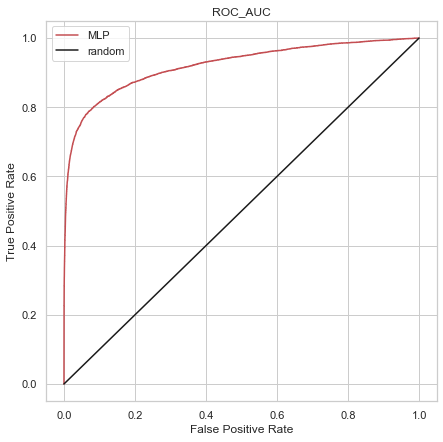

In [68]:
from sklearn.neural_network import MLPClassifier
model_cv_mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', max_iter=500)
#hidden_layer_sizes=(8,8,8), activation='relu', max_iter=500


#scoring accuracy na danych trenujących
print('******ZBIÓR TRENUJĄCY*******')
accuracy_cv_mlp=cross_val_score(model_cv_mlp, X_train_res, y_train_res, cv = 10, scoring='accuracy')
print('Średnie ACCURACY: ' + str(accuracy_cv_mlp.mean().round(3)))
print('Odchylenie standardowe ACCURACY: ' + str(accuracy_cv_mlp.std().round(3)))
print('Stabilność ACCURACY: ' + str((accuracy_cv_mlp.std()*100/accuracy_cv_mlp.mean()).round(3)) + '%')
print('-----')

#scoring recall na danych trenujących
recall_cv_mlp=cross_val_score(model_cv_mlp, X_train_res, y_train_res, cv = 10, scoring='recall' )
print('Średni RECALL: ' + str(recall_cv_mlp.mean().round(3)))
print('Odchylenie standardowe RECALL : ' + str(recall_cv_mlp.std().round(3)))
print('Stabilność RECALL: ' + str((recall_cv_mlp.std()*100/recall_cv_mlp.mean()).round(3)) + '%')
print('-----')
#scoring F1 na danych trenujących
F1_cv_mlp=cross_val_score(model_cv_mlp, X_train_res, y_train_res, cv = 10, scoring='f1' )
print('Średni F1: ' + str(F1_cv_mlp.mean().round(3)))
print('Odchylenie standardowe F1 : ' + str(F1_cv_mlp.std().round(3)))
print('Stabilność F1: ' + str((F1_cv_mlp.std()*100/F1_cv_mlp.mean()).round(3)) + '%')
print('-----')
#scoring PRECISION na danych trenujących
PRECISION_cv_mlp=cross_val_score(model_cv_mlp, X_train_res, y_train_res, cv = 10, scoring='precision' )
print('Średnie PRECISION: ' + str(PRECISION_cv_mlp.mean().round(3)))
print('Odchylenie standardowe PRECISION : ' + str(PRECISION_cv_mlp.std().round(3)))
print('Stabilność PRECISION: ' + str((PRECISION_cv_mlp.std()*100/PRECISION_cv_mlp.mean()).round(3)) + '%')
print('-----')

#scoring ROC_AUC na danych trenujących
ROC_AUC_cv_mlp=cross_val_score(model_cv_mlp, X_train_res, y_train_res, cv = 10, scoring='roc_auc' )
print('Średnie ROC_AUC: ' + str(ROC_AUC_cv_mlp.mean().round(3)))
print('Odchylenie standardowe ROC_AUC : ' + str(ROC_AUC_cv_mlp.std().round(3)))
print('Stabilność ROC_AUC: ' + str((ROC_AUC_cv_mlp.std()*100/ROC_AUC_cv_mlp.mean()).round(3)) + '%')
print('-----')


#SPRAWDZENIE JAK MODEL WYPADA NA ZBIORZE TESTOWYM

print('******ZBIÓR TESTOWY*******')
model_cv_mlp.fit(X_train_res, y_train_res)
y_predicted_mlp = model_cv_mlp.predict(X_test) #przewidywywane 
#y_predicted_mlp=np.where(y_predicted_mlp>0.5, 1, 0)	

#confusion matrix

print("Confusion matrix")
CM_mlp = confusion_matrix(y_test, y_predicted_mlp)
print(CM_mlp)


#Accuracy
ACCURACY_mlp=accuracy_score(y_test, y_predicted_mlp)
print("Accuracy w modelu MLP", round(ACCURACY_mlp,3))

#Recall
RECALL_mlp=recall_score(y_test, y_predicted_mlp)
print("Recall w modelu MLP", round(RECALL_mlp,3))

#F1
F1_mlp=f1_score(y_test, y_predicted_mlp)
print("F1 w modelu MLP", round(F1_mlp, 3) )

#Precision
PRECISION_mlp=precision_score(y_test, y_predicted_mlp)
print("Precyzja w modelu MLP", round(PRECISION_mlp,3))


#ROC_AUC czyli obszar pod wykresem ROC
ROC_AUC_mlp=roc_auc_score(y_test, y_predicted_mlp)
print("ROC_AUC w modelu MLP", round(ROC_AUC_mlp,3))


sns.set(font_scale=1.0, style="whitegrid", rc={'figure.figsize':(7.0,7.0)})
false_positive_rate_mlp, true_positive_rate_mlp, thresholds_mlp = roc_curve(y_test, model_cv_mlp.predict_proba(X_test)[:,1])
plt.plot(false_positive_rate_mlp, true_positive_rate_mlp, 'r-', label='MLP')
plt.plot([0,1],[0,1],'k-',label='random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.show()

### 14. Porównanie modeli

In [75]:

porownanieModeli=pd.DataFrame({"Model":['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestRegressor', 'GaussianNB', 'MLPClassifier', 'KNeighborsClassifier' ],
                               "Accuracy":[ACCURACY_lr, ACCURACY_dtc, ACCURACY_rfr, ACCURACY_gnb, ACCURACY_mlp, ACCURACY_knn],
                               "Recall":[RECALL_lr, RECALL_dtc, RECALL_rfr, RECALL_gnb, RECALL_mlp, RECALL_knn],
                               "Precission":[PRECISION_lr, PRECISION_dtc, PRECISION_rfr, PRECISION_gnb, PRECISION_mlp, PRECISION_knn],
                               "F1":[F1_lr, F1_dtc, F1_rfr, F1_gnb, F1_mlp, F1_knn],
                               "ROC_AUC":[ROC_AUC_lr, ROC_AUC_dtc, ROC_AUC_rfr, ROC_AUC_gnb, ROC_AUC_mlp, ROC_AUC_knn]
})

print(porownanieModeli)

                    Model  Accuracy    Recall  Precission        F1   ROC_AUC
0      LogisticRegression  0.852601  0.757678    0.436469  0.553873  0.811658
1  DecisionTreeClassifier  0.901972  0.665227    0.582411  0.621071  0.799858
2   RandomForestRegressor  0.912886  0.715931    0.620804  0.664983  0.827934
3              GaussianNB  0.893435  0.399552    0.586247  0.475221  0.680411
4           MLPClassifier  0.884124  0.819898    0.512651  0.630853  0.856422
5    KNeighborsClassifier  0.858512  0.738484    0.447948  0.557642  0.806740


### 15. Wybór najlepszego modelu

$\;\;\;$W przypadku modelu churowego celem jest przede wszystkim poprawne przewidzenie wszystkich rzeczywistych jedynek 
(minimalizacja FN), nawet kosztem  większej ilości FP  w przewidywanym zbiorze(czyli zakwalifkowania klientów którzy w rzeczywistości nie odeszli, jako tych zagrożnych ryzykiem  odejścia).  Jest to sytuacja podobna do detekcji fraudów: lepiej pomylić się i wskazać jako transakcję fraudową, taką- która fraudem nie była, niż popełnić odwrotny błąd tj. nie wykryć fraudu i zakwalifikować go jako transakcję nie budzącą ryzyka.

Z biznesowego punktu widzenia, lepiej przeznaczyć część środków finansowych na działania marketingowe na klientów,
którzy nie mieli zamiaru odejść z sieci (np. zaproponowanie  im lepszej oferty), a w zamian mieć w tej grupie właściwie
zidentyfikowanych klientów, którzy faktycznie odejdą. Daje to możliwość  przeprowadzenia odpowednich  działań
mających na celu powstrzymania ich od churnu.  


Wobec powyższego najodpowiedniejszym wskaźnikiem do oceny poprawności modelu wydaje się RECALL.
Oczywiście kierowanie się tylko tą miarę może być mylne. Wybór modelu z bardzo wysokim RECALL, a niską prezycją- z punktu widzenia finansowego firmy też może być  kosztogenny.
Oznacza to, iż firma przeznaczy znaczną część ze swoich środków finansowych  na działania  celem powstrzymania  
od odejścia klientów, którzy takiego zamiaru nie mieli. 

Kryterium, którym będę się kierował przy wyborze modelu to **maksymalny RECALL ze względnie najwyższą precyzją.**

Zakładając, że firma z dotychczasowych analiz finansowych posiada informację o średnim koszcie utrzymania klienta oraz średnim koszcie pozyskania nowego klienta- można przeprowadzić porównanie **kosztogenności każdego z modeli**.
Przyjmując, iż utrzymanie klienta churnowego kosztuje x, a pozyskanie nowego klienta 10x, to można również uznać, iż strata klienta to koszt również 10x. Innymi słowy skoro firma traci jakiegoś klienta, to na jego miejsce musi pozyskać nowego- zatem strata klienta równa jest kosztowi pozyskania nowego klienta.  
Biorąc powyższe pod uwagę:

In [76]:
print('Macierz kosztów przedstawia się następująco:')
macierz_kosztow=np.array([[0,1],[10,1]], dtype='int64')
print(macierz_kosztow)

Macierz kosztów przedstawia się następująco:
[[ 0  1]
 [10  1]]


Przemnażając confusion matrix każdego z modeli przez macierz kosztów, otrzymujemy ostateczny wynik i decyzję co do wyboru modelu:

In [77]:
Zbior_CM=[CM_lr, CM_dtc, CM_rfr, CM_gnb, CM_knn, CM_mlp]
nazwy_Modeli=['LogisticRegression', 'DecisionTreeClassifier','RandomForestRegressor', 'GaussianNB', 'KNeighborsClassifier', 'MLPClassifier']


macierz_kosztow=np.array([[0,1],[10,1]], dtype='int64')

lista_kosztow_tot=[]
for i  in range(0,len(Zbior_CM)):
     j=0
     j=sum(sum(Zbior_CM[i]*macierz_kosztow))
     lista_kosztow_tot.append(j)

lista_Modeli_Wg_Kosztow=pd.DataFrame({'nazwy_modeli':nazwy_Modeli, 'łączne_koszty':lista_kosztow_tot}).sort_values(by=['łączne_koszty'])
print(lista_Modeli_Wg_Kosztow)


             nazwy_modeli  łączne_koszty
5           MLPClassifier          21259
2   RandomForestRegressor          24970
0      LogisticRegression          26003
4    KNeighborsClassifier          26657
1  DecisionTreeClassifier          28071
3              GaussianNB          41801


**Najlepszym modelem okazał się:**

In [80]:
print(lista_Modeli_Wg_Kosztow.head(1))

    nazwy_modeli  łączne_koszty
5  MLPClassifier          21259
